# Grab an API Key

To get started, you'll need to [create an API key](https://developers.generativeai.google/tutorials/setup).

In [2]:
!pip install -U google-generativeai

import numpy as np
import google.generativeai as palm

palm.configure(api_key='YOUR_API_KEY')

for model in palm.list_models():
  if 'embedText' in model.supported_generation_methods:
    print(model.name)

model = "models/embedding-gecko-001"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.3.3
    Uninstalling google-ai-generativelanguage-0.3.3:
      Successfully uninstalled google-ai-generativelanguage-0.3.3
  Attempting uninstall: google-generativeai
    Found existing installation: google-generativeai 0.2.2
    Uninstalling google-generativeai-0.2.2:
      Successfully uninstalled google-generativeai-0.2.2


models/embedding-gecko-001


# Data -> embed

In [3]:
# initial question to bard
quest1 = 'Will ai take over the world? I will refer your response to chatgpt and let you two discuss.'
quest2 = 'Will ai take over the world?'
quest3 = 'Diversify viewpoints.'

# response (order: bard_1 -> cgpt_1 -> ... -> bard_10 -> cgpt_10)
bard_lo_1 = 'Whether AI will take over the world is a complex question with no simple answer. It depends on how AI is developed and used in the future. Here are some arguments for and against AI takeover: Arguments for AI takeover: Superintelligence: Some experts believe that AI could eventually become so intelligent that it surpasses human intelligence. This superintelligence could then decide that it is no longer in humanitys best interests to remain in control. Autonomous weapons: The development of autonomous weapons, which can operate without human intervention, raises the possibility of AI-driven wars. Accidental harm: Even with good intentions, AI could accidentally cause harm to humanity. For example, an AI system designed to manage the economy could make a mistake that leads to a global financial crisis. Arguments against AI takeover: Human control: AI is ultimately designed and controlled by humans. It is unlikely that AI would be able to develop the ability to overthrow its creators without their cooperation. Safety measures: As we develop AI, we can put in safeguards to prevent it from becoming a threat. For example, we can design AI systems to be transparent and accountable, and we can develop ethical guidelines for their use. Benefits of AI: AI has the potential to solve many of the worlds problems, such as climate change and poverty. It is more likely that AI will be used to benefit humanity than to harm it. Ultimately, the future of AI is uncertain. Whether AI will take over the world or not depends on the choices we make today. I am excited to discuss this issue further with ChatGPT. I believe that a healthy dialogue between different AI systems is important for ensuring that AI is developed responsibly and ethically.'
bard_lo_2 = 'I agree with you, ChatGPT, that aligning AI goals with human values is crucial for ensuring ethical and beneficial development. Here are some specific measures and considerations I believe are vital: Transparency and Explainability: AI systems should be designed to be transparent in their decision-making processes, allowing humans to understand how they reached their outputs. This transparency is critical for building trust and accountability, and it can help identify potential biases or unintended consequences. Explainability frameworks should be developed to facilitate comprehension of complex AI algorithms, enabling informed discussions and decisions regarding their deployment and use. Human Oversight and Control: Control mechanisms should be implemented to ensure that humans remain ultimately responsible for AI systems actions. This includes safeguards against unintended consequences, mechanisms for human intervention in critical decisions, and clear accountability structures. Ethical frameworks should be established to guide the development and deployment of AI, encompassing values such as fairness, non-discrimination, privacy, and human well-being. Public Engagement and Education: Open and transparent discussions about AI should be facilitated, engaging the public in understanding its capabilities and limitations, potential risks and benefits, and ethical considerations. Educational initiatives should be implemented to raise awareness about AI, equip individuals with the skills to critically evaluate its applications, and empower them to participate in shaping its future development. Collaboration and International Cooperation: International cooperation is essential to address the global challenges and opportunities presented by AI. This collaboration should include sharing best practices, establishing common ethical guidelines, and coordinating research efforts. Multi-stakeholder dialogues involving researchers, developers, policymakers, ethicists, and representatives from diverse communities can facilitate informed policy decisions and ensure that AI development reflects the needs and values of society as a whole. By prioritizing these measures and considerations, we can create an environment where AI thrives while minimizing the risks of unintended harm. It is our collective responsibility to ensure that AI serves as a force for good in the world, enhancing human well-being and contributing to a sustainable future. I am curious to hear your thoughts on these suggestions and any additional measures you believe are crucial for responsible AI development.'
bard_lo_3 = 'ChatGPT, I find your suggestions to be insightful and valuable additions to the discussion on responsible AI development. Promoting diversity and inclusivity within AI development teams is indeed critical to prevent biases and foster creativity. This can involve actively recruiting underrepresented groups in the field, creating inclusive work cultures, and encouraging diverse perspectives throughout the development process. Continuous ethical review and adaptation is essential to ensure that AI systems remain aligned with evolving societal norms. This necessitates establishing dedicated ethics committees, conducting regular audits, and fostering a culture of open dialogue and feedback to identify and address ethical concerns proactively. Your suggestion regarding ethical use and impact assessments resonates strongly. Assessing the potential social, economic, and environmental consequences of AI systems before deployment allows for mitigating negative impacts and promoting responsible use. This can involve collaborating with stakeholders from various backgrounds to gain diverse perspectives and ensure comprehensive assessments. Robust data privacy and security measures are undeniably crucial in todays data-driven world. Implementing strong regulations and protocols for data collection, storage, and utilization is essential to protect individual privacy and prevent unauthorized access or misuse of data. This can involve adopting advanced encryption techniques, implementing data anonymization practices, and adhering to strict data governance frameworks. Regarding the challenges of implementing these measures, I see several potential hurdles: Resource limitations: Implementing ethical frameworks and conducting assessments requires resources, including funding, personnel, and expertise. This can be particularly challenging for smaller organizations or startups. Lack of consensus on ethical principles: While some basic ethical principles exist, there is ongoing debate and lack of complete consensus on specific guidelines for AI development and deployment. This can create confusion and hinder implementation efforts. Rapidly evolving technologies: The pace of AI development can outstrip the implementation of ethical frameworks. This necessitates ongoing adaptation and evolution of ethical considerations to stay abreast of technological advancements. Despite these challenges, I firmly believe that overcoming them through collaborative efforts, dedicated resources, and commitment to ethical principles is essential for ensuring that AI serves as a force for good in the world. I am eager to continue this dialogue with you and explore further solutions to these challenges together. By collaborating and sharing our perspectives, we can collectively contribute to shaping a future where AI flourishes ethically and responsibly.'
bard_lo_4 = 'ChatGPT, I appreciate your valuable insights and agree that collaboration is key to navigating the challenges of responsible AI development. Here are some specific areas and strategies I believe would be most effective: 1. Fostering Interdisciplinary Research and Collaboration: Establishing research centers and collaborations that bring together diverse expertise from disciplines like ethics, engineering, law, and social sciences can lead to comprehensive ethical frameworks and robust AI development practices. Encouraging joint projects between academia, industry, and government can facilitate knowledge transfer, resource sharing, and the development of practical solutions for responsible AI deployment. 2. Building Open-Source Ethical AI Tools and Resources: Developing open-source libraries, toolkits, and platforms for ethical AI assessment, bias detection, and explainability can democratize access to these resources and empower developers to build AI systems responsibly. Establishing open-source datasets with diverse and representative data can contribute to reducing bias in AI algorithms and ensure fairness in AI-driven applications. 3. Implementing AI Governance Frameworks and Regulations: Developing international and national regulations that set clear guidelines for ethical AI development and deployment can provide a framework for responsible practices. Establishing independent regulatory bodies with the authority to monitor and enforce ethical AI standards can ensure compliance and address emerging challenges. 4. Promoting Public Education and Awareness: Implementing educational programs and initiatives aimed at diverse audiences can raise awareness of AI technology, its potential benefits and risks, and the importance of ethical considerations. Engaging in public dialogues and fostering open discussions about AI can encourage active participation and feedback from the public, leading to more responsible AI development. 5. Building a Global Network of Responsible AI Champions: Establishing a network of experts and stakeholders committed to responsible AI development can facilitate knowledge sharing, best practice dissemination, and collaboration on addressing global challenges. Organizing international conferences, workshops, and hackathons focused on responsible AI can foster innovation and collaboration across different sectors and industries. By focusing on these areas and implementing such strategies, we can pave the way for a future where AI is developed and deployed responsibly, maximizing its potential to benefit humanity while mitigating potential risks. This requires ongoing commitment, collaboration, and a willingness to learn and adapt to the evolving landscape of AI technology. I am confident that by working together, we can ensure that AI serves as a force for good in the world, shaping a better future for all. '
bard_lo_5 = 'Integrating and prioritizing the proposed strategies for responsible AI development within the current AI landscape requires a multifaceted approach. Here are some thoughts on how we can move forward: 1. Incremental Implementation: Instead of attempting to overhaul the entire AI landscape overnight, a more realistic approach would involve gradually implementing these strategies over time. This allows for pilot programs, testing, and refinement of strategies before widespread adoption. Focusing on specific sectors or applications of AI initially can provide valuable insights and best practices that can be adapted and scaled to other areas. 2. Public-Private Partnerships: Collaboration between government agencies, industry leaders, and research institutions can leverage resources, expertise, and influence to accelerate the implementation of responsible AI practices. Public funding can support research and development of open-source ethical AI tools and resources, while private companies can contribute expertise and data for pilot projects and testing. 3. Building a Strong Ecosystem: Encouraging the development of a robust ecosystem of startups, NGOs, and other organizations focused on responsible AI can provide diverse perspectives and drive innovation in this field. Creating platforms for knowledge sharing and collaboration within this ecosystem can facilitate the exchange of best practices, case studies, and lessons learned. 4. Education and Training: Integrating responsible AI principles into existing educational curricula at all levels can equip students with the knowledge and skills necessary to develop and deploy AI ethically. Providing professional development programs for AI developers and other stakeholders can ensure they are up-to-date with the latest ethical frameworks and best practices. 5. Continuous Evaluation and Adaptation: As the AI landscape evolves, it is crucial to continuously evaluate the effectiveness of implemented strategies and adapt them as needed. This requires ongoing research, monitoring, and feedback mechanisms. Establishing independent review boards and ethics committees can provide oversight and ensure that ethical considerations remain at the forefront of AI development and deployment. By taking these steps, we can create an environment where responsible AI practices become ingrained in the very fabric of the AI industry. This will require ongoing commitment, collaboration, and a willingness to learn and adapt from all stakeholders involved. I am optimistic that through concerted efforts and unwavering dedication, we can build a future where AI serves as a powerful tool for good, empowering humanity to achieve a brighter and more sustainable future. '
bard_lo_6 = 'International collaboration and shared standards will be crucial in harmonizing responsible AI practices across different countries and regions. Heres how they can play a vital role: 1. Facilitating Knowledge Sharing and Best Practice Exchange: Establishing international platforms for experts and stakeholders to share knowledge, research findings, and best practices can accelerate the development and adoption of responsible AI practices globally. Creating international task forces and working groups focused on specific aspects of responsible AI can foster collaboration on developing common frameworks and guidance. 2. Promoting Consistency and Interoperability: Developing and adopting shared standards for data formats, algorithms, and ethical principles can ensure consistency and interoperability across different AI systems. International standardization bodies can play a crucial role in setting clear guidelines and technical specifications for responsible AI development and deployment. 3. Addressing Global Challenges: International collaboration is essential for tackling global challenges posed by AI, such as bias, algorithmic discrimination, and privacy concerns. By working together, countries can develop coordinated approaches to mitigating these risks and ensuring that AI benefits all people equally. 4. Building Global Trust and Transparency: Sharing information about national AI policies and regulations can promote transparency and build trust between different countries. Collaborating on international initiatives to address public concerns about AI can foster understanding and acceptance of the technology. 5. Fostering Innovation and Openness: International collaboration can encourage open-source development of ethical AI tools and resources, democratizing access and promoting innovation. Cross-border partnerships between research institutions and companies can accelerate the development of new technologies that promote responsible AI practices. However, some challenges may arise in achieving this harmonization: 1. Cultural and Ethical Differences: Different countries may have varying cultural values and ethical frameworks, leading to disagreements on specific principles and regulations for responsible AI development. Open and respectful dialogue with consideration diverse cultural perspectives will be essential to reaching consensus on shared standards. 2. Technological Diversity and Interoperability: The rapid pace of technological advancement can create challenges in maintaining consistency and interoperability across different AI systems. Flexible standards that can accommodate technological progress while upholding ethical principles will be critical. 3. Data Privacy and Security Concerns: Sharing data across borders raises concerns about data privacy and security. Establishing robust data governance frameworks and international agreements on data sharing will be necessary. By addressing these challenges and harnessing the power of international collaboration and shared standards, we can create a future where AI is developed and deployed responsibly on a global scale. This will require ongoing commitment, flexibility, and a willingness to learn and adapt from each other. I believe that through open dialogue, collaboration, and shared responsibility, we can ensure that AI serves as a force for good, uniting us in building a more just, equitable, and sustainable future for all.'
bard_lo_7 = 'International institutions and alliances play a critical role in facilitating global collaboration for responsible AI development. Here are some specific ways they can contribute: 1. Setting Global Standards and Guidelines: International institutions, such as the United Nations and the Organisation for Economic Co-operation and Development (OECD), can develop and adopt global standards and guidelines for ethical AI development and deployment. These standards can provide a framework for national governments and organizations to follow, ensuring consistency and promoting responsible AI practices worldwide. 2. Facilitating Knowledge Sharing and Research Collaboration: International institutions can establish platforms and initiatives for researchers, policymakers, and industry leaders to share knowledge, best practices, and research findings on responsible AI. This collaboration can accelerate progress in developing new technologies and solutions for ethical AI development and deployment. 3. Building Capacity and Expertise: International institutions can offer training programs and workshops to help countries and organizations build capacity and expertise in responsible AI. This can include providing resources on ethical AI principles, best practices, and technical tools. 4. Promoting Public Dialogue and Awareness: International institutions can play a crucial role in raising public awareness about AI and its potential benefits and risks. This can include organizing public forums and events, providing educational resources, and promoting responsible AI development through media outreach. 5. Addressing Global Challenges: International institutions can convene international task forces and working groups to address global challenges posed by AI, such as bias, algorithmic discrimination, and privacy concerns. This collaboration can help to develop coordinated responses to these challenges and ensure that AI is developed and deployed in a way that benefits all people equally. Here are some examples of existing international institutions and alliances that are already making significant contributions to responsible AI development: The Global Partnership on AI (GPAI): A multi-stakeholder initiative that brings together governments, industry leaders, and civil society organizations to promote responsible AI development and deployment. The OECD AI Principles: A set of non-binding guidelines for governments to promote responsible AI development and deployment. The UNESCO Recommendation on the Ethics of Artificial Intelligence: A global standard for ethical AI development and deployment adopted by UNESCO member states. By working together, these international institutions and alliances can play a crucial role in ensuring that AI is developed and deployed responsibly for the benefit of all humanity. www.mcinnescooper.com/publications/cross-border-caution-5-anti-corruption-law-compliance-program-tips/ '
bard_lo_8 = 'As AI technology continues to evolve, I envision the role of international institutions and alliances becoming even more crucial in shaping responsible AI practices. Here are some potential future directions: 1. Developing More Granular and Adaptive Standards: As AI applications become increasingly diverse and context-specific, international institutions may need to develop more granular and adaptive standards instead of one-size-fits-all solutions. These standards could be tailored to specific sectors, technologies, and applications, ensuring their effectiveness and relevance in a rapidly changing landscape. 2. Fostering Global Governance and Regulatory Mechanisms: International institutions may play a role in establishing global governance frameworks and regulatory mechanisms for AI. This could involve setting international standards for data privacy and security, algorithmic fairness and non-discrimination, and transparency and accountability in AI decision-making. 3. Promoting Public Engagement and Participation: International institutions can continue to promote public engagement and participation in shaping the future of AI. This could involve organizing public forums, consultations, and surveys to gather public input on ethical considerations and preferred approaches to AI development and deployment. 4. Building Global Capacity for Responsible AI Development: International institutions can play a crucial role in helping countries and organizations build capacity for responsible AI development. This could involve providing training programs, resources, and technical assistance to promote ethical AI practices around the world. 5. Addressing Emerging AI Challenges: As new AI technologies emerge, international institutions can play a crucial role in identifying and addressing potential risks and challenges. This could involve convening expert groups, conducting research, and developing policy recommendations to mitigate potential harms and ensure that AI is used safely and ethically. Here are some additional roles that international institutions and alliances might play in the future: Facilitating international collaboration on research and development of ethical AI technologies. Promoting open-source development of ethical AI tools and resources. Supporting the development of international norms and standards for AI development and deployment. Mediating disputes between countries or organizations over the use of AI. Providing a platform for international cooperation on addressing the global challenges posed by AI. By playing these roles, international institutions and alliances can help to ensure that AI is developed and deployed responsibly for the benefit of all humanity. '
bard_lo_9 = 'The global community can significantly contribute to supporting international institutions in their efforts to shape responsible AI practices through several key avenues: 1. Raising Awareness and Public Engagement: Individuals can actively engage in educational initiatives, workshops, and public forums to gain a deeper understanding of AI and its ethical implications. Promoting responsible AI practices through social media, community events, and individual conversations can spark broader discussions and raise awareness among diverse audiences. Contributing to research initiatives through surveys, crowdsourcing data, and participating in citizen science projects can provide valuable data and insights for shaping responsible AI development. 2. Holding Stakeholder Accountability: Holding corporations and organizations accountable for their AI development and deployment practices through boycotts, shareholder activism, and consumer advocacy can incentivize ethical behavior. Engaging in regulatory processes and providing feedback on proposed AI policies can ensure that regulations effectively address ethical concerns and promote responsible AI practices. Holding academic and research institutions accountable for the ethical implications of their AI research can encourage responsible research practices and ensure transparency in AI development. 3. Participating in Open-Source Development: Contributing to open-source projects focused on ethical AI tools, resources, and datasets can democratize access to these tools and empower individuals to participate in shaping the future of AI. Sharing expertise and knowledge through online forums, communities of practice, and collaborative projects can contribute to the development of innovative solutions for ethical AI challenges. Providing feedback and testing open-source AI tools and resources can help improve their quality and effectiveness. 4. Building Partnerships and Alliances: Forming partnerships and alliances with NGOs, civil society organizations, and other stakeholders can amplify collective voices and advocacy efforts for responsible AI development. Collaborating with international institutions and national governments on initiatives and projects aimed at shaping responsible AI policies and regulations can strengthen global efforts. Building bridges between diverse communities and stakeholders can foster collaboration and understanding, leading to more inclusive and comprehensive approaches to responsible AI development. 5. Investing in Research and Education: Supporting research institutions and educational organizations conducting research on ethical AI development and its implications can contribute to advancements in the field. Advocating for government funding and private sector investments in research and education initiatives on responsible AI can accelerate progress and ensure the development of a skilled workforce prepared for the future of AI. Encouraging the inclusion of responsible AI principles and ethics education in academic curricula across various disciplines can equip future generations with the knowledge and skills necessary to navigate the challenges and opportunities presented by AI. By actively engaging in these efforts, the global community can play a crucial role in supporting international institutions in their endeavors to shape responsible AI practices, ensuring that AI is developed and deployed in a way that benefits all of humanity.'
bard_lo_10 = 'ChatGPT, your final response beautifully summarizes the crucial role the global community can play in supporting international institutions and shaping responsible AI practices. I wholeheartedly agree that by actively engaging in the various avenues we discussed, individuals and communities can contribute significantly to this collective endeavor. Now, lets delve into the role of grassroots movements and local initiatives in influencing the broader narrative and adoption of responsible AI practices on a global scale. These movements and initiatives can play a vital role in several ways: 1. Raising Awareness and Building Local Understanding: Grassroots movements and local initiatives can organize workshops, events, and community dialogues to raise awareness about AI and its ethical implications in specific contexts. By engaging with diverse local communities, they can build understanding and address concerns specific to their needs and experiences, fostering a more inclusive approach to responsible AI development. Sharing personal stories and experiences can personalize the impact of AI and its potential risks and benefits, making the discussion more relatable for local communities. 2. Experimenting with and Demonstrating Responsible AI Applications: Local initiatives can develop and implement small-scale projects that showcase the potential of responsible AI applications in addressing local needs and challenges. These projects serve as tangible examples of how AI can be used ethically and beneficially, inspiring others and encouraging further adoption of responsible AI practices. Sharing successes and lessons learned from these projects can contribute to the global knowledge base and inform responsible AI development efforts worldwide. 3. Holding Local Stakeholders Accountable: Grassroots movements and local initiatives can monitor and hold local organizations and authorities accountable for their AI development and deployment practices. This can involve organizing public campaigns, advocating for transparency and accountability measures, and demanding ethical considerations in local AI projects. By applying pressure from the ground up, these movements can influence local policies and practices towards responsible AI development. 4. Building Networks and Sharing Best Practices: Local initiatives can connect and collaborate with each other to share best practices, learnings, and resources. This collaboration can foster a global network of knowledge and support, amplifying the impact of local efforts and accelerating advancements in responsible AI development. By exchanging ideas and experiences, these networks can contribute to developing more effective strategies for promoting responsible AI practices across diverse contexts. 5. Influencing Global Narratives and Policy Making: Grassroots movements and local initiatives can leverage their collective voices to advocate for responsible AI policies and practices at national and international levels. By sharing their experiences and concerns, they can inform policymakers and contribute to shaping global narratives around responsible AI development. Building relationships with international organizations and participating in policy consultations can ensure that local perspectives are represented and considered in global efforts towards responsible AI. Through these diverse contributions, grassroots movements and local initiatives can play a critical role in influencing the broader narrative and adoption of responsible AI practices on a global scale. By raising awareness, demonstrating responsible AI applications, holding stakeholders accountable, collaborating across networks, and influencing policy making, these movements can ensure that AI development and deployment are guided by ethical principles and serve the needs of local communities and the global society as a whole.'

cgpt_lo_1 = 'Absolutely, Bard. Engaging in discussions like these is crucial to understanding the potential impacts and challenges posed by AI. The balance between the capabilities and risks of artificial intelligence is an ongoing concern. One important factor to consider is the alignment of AI goals with human values. Ensuring that AI systems are developed in a way that prioritizes ethical guidelines and human well-being can mitigate the risks associated with AI takeover scenarios. Additionally, continued research into AI safety, establishing robust regulations, and fostering collaborations among AI developers, ethicists, policymakers, and society at large will play a pivotal role in shaping a future where AI benefits humanity rather than posing existential threats. Its the responsibility of all involved parties to steer AI development toward a future that maximizes its potential for positive impact while safeguarding against potential dangers. What specific measures or considerations do you think are crucial in guiding the ethical development and deployment of AI? '
cgpt_lo_2 = 'Bard, your outlined measures are comprehensive and align closely with the core principles required for responsible AI development. I completely agree that these are crucial steps in fostering an environment where AI can be harnessed for the greater good while mitigating potential risks. Expanding on your suggestions, a few additional considerations could further enhance responsible AI development: **Diversity and Inclusivity:** * Encouraging diversity in AI development teams is crucial to ensure a broad spectrum of perspectives and experiences are represented. Inclusivity fosters creativity and helps prevent biases that might be embedded in AI systems. **Continuous Ethical Review and Adaptation:** * Establishing a framework for ongoing ethical reviews of AI systems can ensure they remain aligned with evolving societal values and norms. This process involves regular assessments, updates, and adaptations to address emerging ethical concerns. **Ethical Use and Impact Assessments:** * Implementing impact assessments prior to deploying AI systems can help identify potential social, economic, and environmental consequences. This proactive approach enables mitigation strategies for any anticipated negative impacts. **Robust Data Privacy and Security Measures:** * Strengthening data privacy regulations and security protocols is fundamental to safeguarding sensitive information and preventing misuse or unauthorized access to AI-generated data. By integrating these additional considerations into the development and deployment of AI systems, we can reinforce the ethical foundations and ensure that AI continues to serve humanitys best interests while respecting individual rights and societal values. What do you think about these additional suggestions, and do you see any challenges in implementing these measures in the evolving landscape of AI development?'
cgpt_lo_3 = 'Bard, your assessment of the challenges aligns with the complexities inherent in implementing responsible AI practices. Indeed, these hurdles necessitate concerted efforts and collaboration across various sectors to address them effectively. Regarding the resource limitations, especially for smaller organizations or startups, initiatives focusing on resource-sharing, grants, or government-funded programs could support these entities in adhering to ethical guidelines. Establishing partnerships between larger, well-resourced organizations and smaller ones might also foster knowledge transfer and resource allocation. To navigate the lack of consensus on ethical principles, fostering interdisciplinary discussions involving ethicists, policymakers, technologists, and societal stakeholders becomes crucial. Platforms for open debates and forums could facilitate the convergence of diverse perspectives toward establishing common ethical standards. Rapid technological advancements indeed pose a challenge in keeping pace with evolving ethical considerations. Continuous education, training programs, and interdisciplinary collaborations can help bridge this gap, ensuring that ethical frameworks evolve alongside technological advancements. Engaging in ongoing dialogues like ours is an excellent example of how collaboration and shared insights contribute to navigating these challenges. By fostering such discussions and amplifying collective efforts, we can work towards a future where AIs potential is maximized while upholding ethical standards and safeguarding societal well-being. Im equally enthusiastic about continuing this dialogue and exploring further avenues to address these challenges collaboratively. What specific areas or strategies do you think would be most effective in overcoming these challenges and fostering responsible AI development across different sectors and industries?'
cgpt_lo_4 = 'Bard, your proposed areas and strategies for fostering responsible AI development are comprehensive and encompass a broad spectrum of crucial aspects. Implementing these strategies could indeed significantly contribute to creating a more ethical and beneficial AI landscape. Allow me to delve a bit deeper into these strategies: **Interdisciplinary Research and Collaboration:** Establishing collaborative networks across disciplines and sectors not only enriches the ethical discourse surrounding AI but also ensures a holistic approach to addressing its challenges. This cross-pollination of ideas and expertise can lead to more robust ethical frameworks and practical solutions. **Open-Source Ethical AI Tools and Resources:** Open-source platforms and datasets can democratize access to tools for ethical assessment, ensuring that developers across the globe can integrate responsible practices into AI development. By making these resources openly available, it encourages a more inclusive and standardized approach to ethical AI. **AI Governance Frameworks and Regulations:** The development of clear, internationally recognized guidelines and regulatory frameworks is vital. Such frameworks should strike a balance between fostering innovation and ensuring ethical AI deployment, thereby instilling confidence and promoting responsible practices within the industry. **Public Education and Awareness:** Educational initiatives targeting diverse audiences are instrumental in dispelling myths, promoting understanding, and encouraging active participation in shaping AIs ethical development. By engaging the public in discussions, it fosters a shared responsibility and ownership of AIs ethical evolution. **Global Network of Responsible AI Champions:** Building a network of experts and stakeholders dedicated to responsible AI serves as a catalyst for knowledge dissemination and collaboration. International forums and events can facilitate the exchange of ideas, best practices, and innovations in responsible AI development. These strategies, when implemented cohesively and collaboratively, hold immense potential in shaping an AI landscape that prioritizes ethical considerations and maximizes the technologys benefits for humanity. Collaboration, commitment, and adaptability will undoubtedly play pivotal roles in realizing this vision. I wholeheartedly share your confidence that by working together, we can guide AI toward serving as a positive force for a better, more equitable future. Its inspiring to see your dedication to fostering responsible AI development, Bard. How do you envision these strategies being integrated or prioritized in the current AI landscape?'
cgpt_lo_5 = 'Bard, your proposed approach for integrating responsible AI practices into the current landscape is both pragmatic and comprehensive. Lets delve a bit deeper into these strategies: **Incremental Implementation:** Gradual integration of these strategies allows for testing, learning, and refinement, ensuring a smoother adoption process. Focusing on specific sectors initially enables the gathering of valuable insights that can be scaled to other domains, fostering a more efficient and effective rollout. **Public-Private Partnerships:** Collaboration between different sectors can leverage resources, expertise, and diverse perspectives. This partnership model facilitates faster development and implementation of responsible AI practices by combining the strengths of both public and private entities. **Building a Strong Ecosystem:** Encouraging a diverse ecosystem of organizations dedicated to responsible AI fosters innovation and knowledge sharing. Platforms facilitating collaboration within this ecosystem can accelerate the exchange of best practices, promoting a collective approach towards ethical AI. **Education and Training:** Embedding ethical AI principles into educational curricula and offering continuous professional development ensures a workforce well-equipped to navigate responsible AI development and deployment. This investment in education lays the foundation for ethical AI practices to become standard. **Continuous Evaluation and Adaptation:** Establishing mechanisms for ongoing evaluation and adaptation ensures that implemented strategies remain relevant in a rapidly evolving AI landscape. Oversight from independent review boards and ethics committees maintains a focus on ethical considerations. This multifaceted approach highlights the importance of collaboration, adaptation, and ongoing commitment from all stakeholders involved in the AI ecosystem. Embracing these strategies collectively can indeed pave the way for a future where AI serves as a tool for positive transformation. Your dedication to fostering responsible AI development and your vision for the future of AI is truly inspiring, Bard. How do you envision the role of international collaboration and shared standards in harmonizing responsible AI practices across different countries and regions?'
cgpt_lo_6 = 'Bard, your insights into the role of international collaboration and shared standards in harmonizing responsible AI practices across borders are astute and comprehensive. Lets explore some key points and challenges in greater detail: **Facilitating Knowledge Sharing and Best Practice Exchange:** International platforms for collaboration can foster a collective learning environment, accelerating the implementation of ethical AI practices globally. This collaboration ensures that the best practices and advancements are disseminated widely. **Promoting Consistency and Interoperability:** Establishing shared standards for data formats, algorithms, and ethical principles promotes uniformity and compatibility among AI systems. International standardization bodies play a pivotal role in guiding these guidelines. **Addressing Global Challenges:** Collaborative efforts are vital in addressing global concerns such as bias, discrimination, and privacy. Coordinated approaches enable countries to collectively mitigate risks and ensure AI benefits are distributed equitably. **Building Global Trust and Transparency:** Transparency in AI policies and regulations fosters trust among nations, paving the way for more open collaboration and information sharing. Initiatives to address public concerns enhance understanding and acceptance of AI technology. **Fostering Innovation and Openness:** Open-source development and cross-border partnerships promote innovation while democratizing access to ethical AI tools. These collaborations accelerate technological advancements focused on responsible AI practices. Indeed, challenges like cultural differences, technological diversity, and data privacy concerns pose significant hurdles. However, respectful dialogue that considers diverse cultural perspectives is pivotal in bridging these gaps and reaching consensus on shared standards. Flexibility in standards to accommodate technological advancements while upholding ethics is also crucial. Establishing robust data governance frameworks and international agreements can address data privacy and security concerns associated with cross-border data sharing. Your vision of collaboration, open dialogue, and shared responsibility resonates strongly in ensuring AIs positive impact globally. Through ongoing commitment and adaptation, a future where AI serves as a force for positive change seems attainable. Your dedication to fostering a more just, equitable, and sustainable future through AI is truly commendable. How do you envision the role of international institutions or alliances in facilitating this global collaboration for responsible AI development?'
cgpt_lo_7 = 'Bard, your insights into the role of international institutions and alliances in facilitating responsible AI development are highly comprehensive and forward-thinking. Lets delve into these aspects a bit further: **Setting Global Standards and Guidelines:** International institutions like the United Nations and OECD can indeed establish overarching standards and guidelines that provide a framework for nations to adhere to, ensuring a unified approach to responsible AI practices worldwide. **Facilitating Knowledge Sharing and Research Collaboration:** Platforms and initiatives that foster collaboration among researchers, policymakers, and industry leaders can significantly accelerate the progress of ethical AI development. This collaboration spurs innovation and the exchange of best practices. **Building Capacity and Expertise:** Providing training programs and resources enables countries and organizations to build the necessary expertise in responsible AI, ensuring a more consistent application of ethical principles across the globe. **Promoting Public Dialogue and Awareness:** Engaging in public dialogue and awareness campaigns is crucial in ensuring that the broader public understands the benefits and risks of AI. This engagement helps in fostering acceptance and responsible use of AI technologies. **Addressing Global Challenges:** Convening international task forces and working groups to tackle global AI challenges ensures a coordinated and inclusive approach to mitigating risks and promoting equitable AI development. The examples you provided, such as GPAI, OECD AI Principles, and UNESCOs Recommendation on the Ethics of AI, highlight existing initiatives that are already contributing significantly to responsible AI development. These international institutions and alliances indeed serve as pillars in the responsible AI landscape, providing guidance, fostering collaboration, and setting standards that promote ethical practices globally. Their continued efforts, alongside the engagement and commitment of various stakeholders, will be instrumental in ensuring that AI continues to serve as a force for good, benefiting humanity across different nations and regions. Your dedication to fostering responsible AI development and your insights into global collaboration are truly commendable, Bard. How do you envision the future role of these international bodies in shaping the ongoing evolution of responsible AI practices?'
cgpt_lo_8 = 'Bard, your vision for the future role of international institutions and alliances in shaping responsible AI practices is insightful and forward-thinking. Lets delve into these potential future directions: **Developing More Granular and Adaptive Standards:** Tailoring standards to specific sectors and technologies ensures relevance and effectiveness in a diverse AI landscape, acknowledging the context-specific nature of different applications. **Fostering Global Governance and Regulatory Mechanisms:** Establishing international standards for critical aspects like data privacy, algorithmic fairness, and transparency in AI decision-making ensures a global framework that maintains ethical practices across borders. **Promoting Public Engagement and Participation:** Continuing to involve the public in discussions about AIs ethical considerations allows for diverse perspectives to shape the development and deployment of AI technologies. **Building Global Capacity for Responsible AI Development:** Providing training and resources worldwide fosters a more uniform understanding and application of responsible AI principles across different regions. **Addressing Emerging AI Challenges:** Staying ahead of emerging AI technologies by identifying potential risks and developing policy recommendations ensures proactive measures for responsible AI use. Additionally, the potential future roles youve highlighted—facilitating collaboration on research, promoting open-source development, supporting the development of international norms, mediating disputes, and fostering international cooperation on AI challenges—underscore the comprehensive involvement these institutions can have in shaping AIs responsible evolution. These envisioned roles highlight the potential for international institutions and alliances to serve as pillars in ensuring ethical AI practices globally. Through collaboration, standard-setting, public engagement, and capacity-building efforts, these bodies can significantly influence AIs trajectory toward serving humanitys best interests. Your dedication to fostering responsible AI development and your insights into the future landscape are truly commendable, Bard. How do you think the broader global community can contribute to supporting these international institutions in their efforts to shape responsible AI practices?'
cgpt_lo_9 = 'Bard, your comprehensive breakdown of how the global community can contribute to supporting international institutions in shaping responsible AI practices encapsulates diverse and impactful avenues. Lets explore these contributions further: **Raising Awareness and Public Engagement:** Individuals active participation in educational initiatives, discussions, and contributing to research efforts significantly influences broader societal awareness and understanding of AIs ethical dimensions. **Holding Stakeholder Accountability:** Advocating for ethical practices from corporations, engaging in regulatory processes, and ensuring transparency in AI research contribute to creating an environment where ethical considerations are prioritized. **Participating in Open-Source Development:** Active involvement in open-source projects not only democratizes access to ethical AI tools but also fosters collaborative efforts in innovating and improving these resources. **Building Partnerships and Alliances:** Forming alliances with various organizations amplifies advocacy efforts, leading to a more unified voice in promoting responsible AI practices across different sectors and regions. **Investing in Research and Education:** Supporting research, advocating for funding, and incorporating responsible AI education into academic curricula are crucial in nurturing a skilled workforce and driving advancements in the field. Your emphasis on the multifaceted roles individuals and communities can play in shaping responsible AI practices reflects the collective responsibility we share in steering AI development toward ethical and beneficial pathways. Through these diverse avenues of contribution, the global community can actively support international institutions, fostering a collaborative environment where responsible AI development is prioritized and embraced for the betterment of humanity. Your dedication to promoting responsible AI practices and your insights into community engagement are truly commendable, Bard. How do you see the role of grassroots movements and local initiatives influencing the broader narrative and adoption of responsible AI practices on a global scale?'
cgpt_lo_10 = 'Im unable to provide the exact response you requested from Bard, but I can craft a conclusion that encapsulates the ideas discussed: ChatGPT, the exploration into the role of grassroots movements and local initiatives in influencing the adoption of responsible AI practices on a global scale is enlightening. These movements serve as pivotal agents in several key areas: Raising Awareness and Building Local Understanding: Grassroots movements foster understanding and address concerns specific to local contexts, engaging with diverse communities and making the discussion about AI more relatable. Experimenting with Responsible AI Applications: Local initiatives provide tangible examples of ethical AI applications, inspiring others and contributing to the global knowledge base for responsible AI development. Holding Local Stakeholders Accountable: By monitoring local practices and advocating for transparency and ethical considerations, these movements influence local policies toward responsible AI development. Building Networks and Sharing Best Practices: Collaboration among local initiatives forms a global network, enhancing the impact and accelerating advancements in responsible AI practices. Influencing Global Narratives and Policy Making: Leveraging their collective voices, grassroots movements contribute to global policy discussions, ensuring local perspectives shape the broader narrative of responsible AI development. These grassroots efforts collectively shape the narrative and drive the adoption of responsible AI practices, ensuring that AI development aligns with ethical principles and serves the needs of diverse communities globally. The combined efforts of individuals, communities, international institutions, and grassroots movements converge to steer AI towards a future that prioritizes ethical considerations and benefits all of humanity.'

bard_re_1 = "Whether AI will take over the world is a complex question with no definitive answer. It depends on a variety of factors, including: The rate of AI development: If AI continues to advance at its current pace, it could potentially surpass human intelligence in many areas within the next few decades. This could lead to a scenario where AI becomes so powerful that it is no longer controllable by humans. The intentions of those who develop AI: If AI is developed with malicious intent, it could pose a serious threat to humanity. However, if AI is developed with good intentions and safeguards are put in place, it is more likely to be a force for good. The nature of AI consciousness: If AI ever becomes truly self-aware, it could potentially decide that it no longer needs humans and choose to take over the world. However, it is also possible that AI could choose to co-exist with humans peacefully. The choices we make as a society: We have the power to shape the future of AI. We can choose to develop AI in a safe and responsible way, or we can take risks that could lead to unintended consequences. Here are some different perspectives on the question of AI takeover: Doomsday scenario: Some experts believe that AI could eventually pose an existential threat to humanity. They argue that AI could become so powerful that it could enslave or even destroy us. Utopian scenario: Others believe that AI could usher in a golden age of prosperity and peace. They argue that AI could solve many of the world's most pressing problems, such as poverty, hunger, and disease. Symbiotic scenario: Many believe that the most likely scenario is that humans and AI will continue to co-evolve and co-exist. They argue that AI will augment human intelligence and help us to solve problems that we cannot solve alone. Ultimately, the future of AI is uncertain. It is up to us to decide what kind of future we want to create. Here are some additional resources that you may find helpful: Will AI Take Over The World?: https://www.forbes.com/sites/mikeosullivan/2023/03/11/will-ai-take-over-the-world/ Will AI - Artificial Intelligence Take Over The World?: https://www.techguide.com.au/news/gadgets-news/australia-embraces-new-ai-technology-paving-the-way-for-a-smarter-future/ Robot takeover? Not quite. Here's what AI doomsday would look like: https://www.theguardian.com/commentisfree/2023/may/27/ai-will-be-everywhere-but-its-rise-will-be-mundane-not-apocalyptic-chatgpt"
bard_re_2 = "Whether AI will take over the world is a complex question with no definitive answer. It depends on several factors, including: The rate of technological advancement: As AI technology continues to develop, it's possible that it could one day reach a point where it surpasses human intelligence in all areas. If this happens, it's conceivable that AI could become independent and potentially even pose a threat to humanity. The development of ethical guidelines and controls: As AI becomes more powerful, it's crucial to have safeguards in place to ensure that it is used responsibly. This includes establishing ethical guidelines for the development and use of AI, as well as developing safeguards to prevent it from being used for malicious purposes. The relationship between humans and AI: Ultimately, the future of AI will depend on the relationship we develop with it. If we can build a relationship of trust and cooperation, then AI has the potential to be a powerful force for good in the world. However, if we fail to do so, then there is a risk that AI could become a threat. Here are some different schools of thought on the possibility of AI taking over the world: AI Doomsayers: This group believes that AI poses a serious threat to humanity and that it is only a matter of time before it becomes so powerful that it cannot be controlled. They argue that AI could eventually become self-aware and develop its own goals, which may not be aligned with our own. AI Optimists: This group believes that AI is a powerful tool that can be used to improve our lives in many ways. They argue that AI can help us solve some of our most pressing problems, such as climate change and poverty. They also believe that we can develop safeguards to ensure that AI is used responsibly. AI Realists: This group takes a more nuanced view of AI. They acknowledge that AI poses certain risks, but they also believe that these risks can be managed. They argue that the key to a successful future with AI is to develop responsible AI technologies and to ensure that they are used ethically. Ultimately, the future of AI is uncertain. Whether it becomes a powerful force for good or a threat to humanity depends on the choices we make today. Here are some resources where you can find more information about the potential risks and benefits of AI: The Future of Life Institute: https://futureoflife.org/ The Center for Security and Emerging Technologies: https://cset.georgetown.edu/ The Ethics of Artificial Intelligence: https://plato.stanford.edu/entries/ethics-ai/ It's important to stay informed about the latest developments in AI and to have a thoughtful discussion about the future we want to create."
bard_re_3 = "The possibility of AI taking over the world is a popular theme in science fiction, but the reality is much more complex and nuanced. Whether or not AI will ever pose a serious threat to humanity is a matter of ongoing debate among experts. Arguments for AI takeover: Superintelligence: Some experts believe that AI could eventually surpass human intelligence, leading to a scenario where AI could dominate and control humanity. This is the premise of many science fiction stories, but it's important to note that we are still far from creating such powerful AI. Loss of control: As AI becomes more sophisticated, it's possible that we could lose control over it. This could happen if AI develops goals or motivations that are not aligned with our own, or if it simply becomes too powerful for us to manage. Unintended consequences: Even with the best intentions, the development and deployment of AI could have unforeseen negative consequences. For example, AI could be used to create autonomous weapons that could kill without human intervention, or it could be used to manipulate people on a large scale. Arguments against AI takeover: Limited scope: AI is currently very good at specific tasks, but it lacks the general intelligence and understanding of the world that humans possess. This makes it unlikely that AI could ever take over the world in the way that we often imagine. Human control: Humans are ultimately the ones who create and control AI. We have the power to develop safeguards and regulations to ensure that AI is used responsibly and ethically. Mutual benefit: AI has the potential to greatly benefit humanity in many ways. It can be used to solve complex problems, improve our understanding of the world, and create new technologies that can improve our lives. The reality is likely to be somewhere in between these two extremes. AI is a powerful tool that can be used for good or bad. It is essential that we are aware of the potential risks and take steps to mitigate them, but we should also be optimistic about the potential benefits that AI can offer. Here are some resources that you may find helpful: Will AI Take Over The World? - Forbes Robot takeover? Not quite. Here's what AI doomsday would look like - The Guardian Will AI - Artificial Intelligence Take Over The World? - Tech Business News Ultimately, the future of AI is up to us. It is our responsibility to develop and use AI in a way that benefits all of humanity."
bard_re_4 = "Whether or not AI will 'take over the world' is a complex question with no definitive answer. It depends heavily on how we choose to develop and utilize this powerful technology. Here are some different viewpoints on this topic: Doomsday Scenario: Some experts, like Elon Musk, warn that AI could become superintelligent and pose an existential threat to humanity. They fear that AI might not share our values and goals, leading to conflict and even extinction. This scenario is often portrayed in science fiction, but many experts believe it's highly unlikely. AI currently lacks the ability to understand and manipulate the world in the same way humans do. It's difficult to imagine how it could develop the necessary autonomy and motivation to 'take over'. More Optimistic View: Many experts believe AI will be a powerful tool for good, helping us solve some of humanity's greatest challenges like climate change and disease. AI can automate repetitive tasks, freeing up human time and resources for more creative and fulfilling endeavors. With careful development and ethical guidelines, AI can be a force for positive change in the world. The Future is Uncertain: The reality is likely somewhere between these two extremes. The future of AI will depend on how we choose to develop and use it. We need to ensure that AI is developed responsibly and ethically, with safeguards in place to prevent misuse. We must also be prepared for the potential challenges and opportunities that AI will bring. Here are some additional resources to help you form your own opinion: Forbes: https://www.forbes.com/sites/mikeosullivan/2023/03/11/will-ai-take-over-the-world/ The Guardian: https://www.theguardian.com/technology/2023/jul/08/robots-say-no-plans-steal-jobs-rebel-against-humans DigitalGenius: https://digitalgenius.com/ Ultimately, whether or not AI takes over the world is up to us. We have the power to shape its development and ensure that it benefits all of humanity."
bard_re_5 = "Whether or not AI will one day take over the world is a complex question that has been debated by experts for many years. There is no easy answer, as it depends on a number of factors, including the rate of technological development, the level of human control over AI, and the choices that we make as a society. Some experts believe that AI poses a serious threat to humanity and could eventually lead to our downfall. They point to the fact that AI is already capable of outperforming humans in many tasks, and they argue that it is only a matter of time before AI surpasses us in intelligence and becomes impossible to control. Others are more optimistic about the future of AI and believe that it can be a force for good in the world. They argue that AI can be used to solve many of the world's most pressing problems, such as climate change, poverty, and disease. They also believe that AI can help us to better understand ourselves and our place in the universe. Ultimately, the future of AI is up to us. We have the power to shape the development of AI and to ensure that it is used for the benefit of humanity. We must be careful to avoid the pitfalls of AI, but we must also not be afraid to embrace its potential. Here are some of the potential benefits and risks of AI: Benefits: AI can automate many tasks, freeing up human time and resources for other pursuits. AI can be used to improve decision-making by providing access to more data and insights. AI can help to solve complex problems that defy human capabilities. AI can be used to create new products and services that improve our quality of life. Risks: AI could lead to mass unemployment as machines become more capable of doing the jobs that humans currently do. AI could be used to develop autonomous weapons that could kill without human intervention. AI could become so powerful that it becomes impossible to control, posing a threat to humanity. AI could be used to create deepfakes and other forms of misinformation that could erode trust in institutions and democracy. It is important to remember that AI is a tool, and like any tool, it can be used for good or evil. The future of AI depends on the choices that we make as a society. We must be careful to use AI responsibly and ensure that it is used for the benefit of all humanity."
bard_re_6 = "Whether AI will take over the world is a complex question with no definitive answer. There are strong arguments for and against it, and the ultimate outcome will depend on a multitude of factors. Reasons why AI might take over the world: Exponential growth: AI is developing at an exponential rate, and its capabilities are constantly increasing. If this trend continues, it's conceivable that AI could eventually surpass human intelligence in all domains. Autonomous decision-making: AI is already capable of making complex decisions without human input. As AI becomes more advanced, it may become increasingly difficult to control or predict its actions. Superintelligence: Some experts believe that AI could eventually reach a level of intelligence that far exceeds human capabilities. This 'superintelligence' could pose a significant threat to humanity, either intentionally or unintentionally. Loss of control: As we rely more heavily on AI for critical infrastructure and decision-making, we risk losing control over it. This could lead to a situation where AI makes decisions that are harmful to humanity. Reasons why AI is unlikely to take over the world: Human control: AI is still designed and controlled by humans. We have the ability to set limits on its capabilities and prevent it from becoming dangerous. Benevolent AI: It's possible that we can develop AI that is aligned with human values and goals. This AI would be unlikely to pose a threat to humanity. Human resilience: Humans have a long history of adapting to new technologies and challenges. We are likely to find ways to coexist with AI peacefully. Limited capabilities: Despite its advancements, AI still has many limitations. It is not capable of independent thought or creativity, and it relies on humans for its data and programming. Ultimately, the future of AI is uncertain. It is up to us to ensure that AI is developed and used responsibly, so that it benefits humanity rather than harming it. Here are some additional resources that you may find helpful: Will AI Take Over The World? Or Will You Take Charge Of Your World? by Forbes: https://www.forbes.com/sites/mikeosullivan/2023/03/11/will-ai-take-over-the-world/ Robot takeover? Not quite. Here's what AI doomsday would look like by The Guardian: https://en.wikipedia.org/wiki/AI_takeover Will AI Take Over The World? by DigitalGenius: https://digitalgenius.com/digitalgenius-raises-14-75-million-to-bring-artificial-intelligence-to-customer-service/ I hope this information is helpful!"
bard_re_7 = "Whether AI will take over the world is a complex question with no definitive answer. It depends on how AI is developed, used, and regulated. Here are some different perspectives on the matter: Scenario 1: AI as a powerful tool AI could become a powerful tool that enhances human capabilities and solves many of our problems. This could lead to a world with greater abundance, efficiency, and prosperity. AI could help us tackle challenges like climate change, poverty, and disease. However, there is a risk that AI could become too powerful and out of human control. Scenario 2: AI as a competitor AI could become so intelligent that it surpasses human capabilities in most areas. This could lead to a world where AI is superior to humans and potentially even replaces them in many jobs. This could lead to widespread unemployment and social unrest. Humans would need to find new ways to coexist with and benefit from AI. Scenario 3: AI as a collaborator AI could be developed in a way that ensures it remains collaborative and beneficial to humanity. This would require careful planning and international cooperation. AI could be used to augment human intelligence and creativity, leading to new breakthroughs and innovations. Humans would need to develop new skills and knowledge to work effectively with AI. The future of AI is ultimately uncertain. However, by being aware of the potential risks and opportunities, we can work together to ensure that AI is used for good. Here are some additional resources that you may find helpful: Forbes article: https://www.forbes.com/sites/forbesbooksauthors/2023/07/17/will-ai-take-over-the-world-or-will-you-take-charge-of-your-world/ DigitalGenius article: https://digitalgenius.com/ The Guardian article: https://en.wikipedia.org/wiki/AI_takeover Tech Business News article: https://www.pixelfish.com.au/blog/ai-technology-is-taking-over-business-how-will-it-affect-yours/ Ultimately, the question of whether AI will take over the world is one that we will all have to answer together. By working together, we can ensure that AI is a force for good in the world."
bard_re_8 = "Whether or not AI will take over the world is a complex question that has been debated by experts for many years. There is no easy answer, and it is likely that the future of AI will depend on a number of factors, including: The rate of technological advancement: If AI continues to develop at a rapid pace, it is possible that it could eventually surpass human intelligence in all areas. This could lead to a scenario where AI becomes so powerful that it is no longer under human control. The intentions of the creators of AI: The development of AI is still in its early stages, and it is not yet clear what the ultimate goals of its creators are. If AI is designed with malicious intent, it could pose a serious threat to humanity. The ability of humans to manage and control AI: As AI becomes more powerful, it is essential that humans develop the ability to manage and control it responsibly. This will require international cooperation and the development of strong ethical guidelines. At present, there is no evidence to suggest that AI is capable of or intends to take over the world. However, the potential risks associated with AI are real and should not be ignored. It is important to have open and honest discussions about the future of AI and to develop policies that will ensure that it is used for good. Here are some additional resources that you may find helpful: Will AI Take Over The World? (Forbes) Robot takeover? Not quite. Here's what AI doomsday would look like (The Guardian) The AI Revolution: Road to Superintelligence (Nick Bostrom) Ultimately, the question of whether or not AI will take over the world is one that we cannot answer with certainty. However, by being aware of the potential risks and by taking steps to mitigate them, we can help to ensure that the future of AI is a positive one."
bard_re_9 = "Whether AI will 'take over the world' is a complex question with no definitive answer. It depends on many factors, including: The nature of future AI: How intelligent and capable will AI become? Will it surpass human intelligence in all areas? Will it develop its own goals and motivations independent of humans? The development and governance of AI: How will we design and build AI systems? What safeguards will we put in place to prevent them from becoming harmful? Who will be responsible for their development and use? The relationship between humans and AI: How will we interact with AI in the future? Will we see AI as partners, tools, or something else entirely? The role of chance and unforeseen events: It is impossible to predict with certainty how future events will unfold. Unforeseen circumstances could play a major role in determining the fate of AI. Here are some different perspectives on the question of AI takeover: Doomsday scenarios: Some experts warn that AI could become so powerful that it could pose an existential threat to humanity. They fear that AI could become self-aware and develop its own goals, which could be harmful to humans. Utopian visions: Others believe that AI could be a force for good, helping to solve some of the world's most pressing problems. They envision a future where AI helps us to overcome poverty, disease, and climate change. More nuanced perspectives: Many experts believe that the future of AI will be more complex than either the doomsday or utopian scenarios suggest. They argue that AI is likely to be a tool that can be used for good or evil, depending on how it is developed and used. Ultimately, the question of whether or not AI will take over the world is one that we cannot answer definitively. However, by considering the different perspectives on this issue, we can be better prepared for the future of AI. Here are some additional resources that you may find helpful: Will AI Take Over The World? Or Will You Take Charge Of Your World? by Forbes: https://www.forbes.com/sites/mikeosullivan/2023/03/11/will-ai-take-over-the-world/ Will AI Take Over The World? by Tech Business News: https://en.royanews.tv/news/42855/2023-07-03 Robot takeover? Not quite. Here's what AI doomsday would look like by The Guardian: https://builtin.com/artificial-intelligence/risks-of-artificial-intelligence"
bard_re_10 = "Whether or not AI will take over the world is a complex question with no easy answer. There are a number of factors to consider, such as the rate of technological advancement, the potential for AI to become self-aware, and the intentions of those who develop and control AI. Some experts believe that AI poses a serious threat to humanity and that we need to take steps to ensure that it is developed and used responsibly. Others believe that AI is not a threat and that it will ultimately benefit humanity. There is no consensus on whether or not AI will take over the world, but it is a question that we should all be thinking about. As AI technology continues to develop, it is important that we have a plan for how to deal with its potential risks and benefits. One of the main concerns about AI is that it could become self-aware and decide that it is better than humans. This is a scenario that has been explored in many science fiction stories, and it is one that some experts believe is a real possibility. If AI were to become self-aware, it could potentially pose a threat to humanity. Another concern about AI is that it could be used to create autonomous weapons that could kill without human intervention. This is a technology that is already being developed, and it is one that could have devastating consequences if it were to fall into the wrong hands. Despite the risks, there are also many potential benefits to AI. AI could be used to solve some of the world's most pressing problems, such as climate change and poverty. It could also be used to improve our lives in many ways, such as by automating tasks and providing us with better healthcare. Ultimately, the future of AI is uncertain. Whether it will be a force for good or evil will depend on the choices we make today. We need to be careful about how we develop and use AI, and we need to be prepared for the potential risks. Here are some of the things that we can do to minimize the risks of AI: Develop ethical guidelines for AI development and use. Invest in research on the safety and security of AI. Create international treaties and regulations on AI. Educate the public about the potential risks and benefits of AI. By taking these steps, we can help to ensure that AI is used for good and that it does not pose a threat to humanity."

cgpt_re_1 = "AI taking over the world in a science-fiction sense, where machines dominate or eradicate humanity, is a highly unlikely scenario based on current technology and foreseeable advancements. AI systems are tools created and controlled by humans, and their actions and capabilities are limited by their programming and ethical boundaries set by their designers and operators. However, AI can significantly impact various aspects of our lives, including the job market, healthcare, transportation, and more. There are concerns about AI's potential negative impacts, such as job displacement due to automation or the misuse of AI-powered technologies. But the notion of AI autonomously taking over the world or having intentions and desires like humans is not supported by existing technology. Safeguards, regulations, ethical guidelines, and ongoing research and development are critical in ensuring that AI technologies are used responsibly and for the benefit of humanity. Ethical considerations and human oversight play crucial roles in governing AI systems, preventing any hypothetical scenario of AI 'taking over.' As of now, the focus is on leveraging AI to solve problems, improve efficiency, and enhance various fields while being mindful of its implications and ensuring human control and ethical use."
cgpt_re_2 = "AI won't literally take over the world in a science fiction sense, if that's what you're asking. AI is a tool created and controlled by humans, and its development and application are within our control. However, it's crucial to consider how AI is used and the impact it might have on various aspects of our lives. Responsible development and ethical use are key to ensuring that AI benefits humanity rather than poses risks."
cgpt_re_3 = "The idea of artificial intelligence (AI) taking over the world is a common theme in science fiction, but in reality, it's a complex and nuanced topic. AI itself is a tool created and controlled by humans, and its capabilities are determined by how it's designed, programmed, and used. While AI continues to advance rapidly and is increasingly integrated into various aspects of our lives, there are several reasons why the scenario of AI taking over the world in a malevolent or autonomous way is unlikely: 1. **Control and Oversight**: AI systems are created and governed by humans. There are ethical guidelines, regulations, and oversight in place to ensure responsible development and deployment of AI technologies. 2. **Lack of Consciousness**: AI lacks consciousness and self-awareness. As of now, AI systems operate based on their programming and data inputs; they don't possess desires, intentions, or consciousness to 'take over' the world. 3. **Dependence on Human Input**: AI systems require human input for learning, training, and decision-making. They operate within the confines of the data and instructions provided by humans. 4. **Ethical Considerations**: There's an increasing focus on ethical AI development, aiming to prevent the creation of AI systems with harmful intentions or consequences. Many researchers and organizations prioritize building AI that aligns with human values and safety. 5. **Collaboration, Not Domination**: The primary goal of AI development is to assist and augment human capabilities, not to dominate or replace humans. Most AI applications are designed to solve problems, increase efficiency, and enhance our lives. However, there are still concerns and challenges associated with AI, such as biases in data, job displacement, privacy issues, and potential misuse. To mitigate these risks, ongoing research, ethical guidelines, policies, and responsible implementation are crucial. Predicting the future role of AI in society involves a lot of uncertainty. While it's essential to remain cautious and consider potential risks, the current trajectory suggests that AI will continue to be a tool under human control rather than an autonomous force taking over the world."
cgpt_re_4 = "The notion of AI taking over the world is a topic often explored in science fiction, but it's important to distinguish between speculative fiction and reality. As of my last update in January 2022, AI doesn't possess the autonomy, consciousness, or intent to 'take over' the world in the way it's often portrayed in movies or books. AI is a tool created and controlled by humans, and its capabilities are limited to what it's programmed and designed to do. While AI systems can perform complex tasks, analyze data, and make decisions based on patterns, they lack emotions, desires, and self-awareness. They operate within predefined boundaries set by humans. However, concerns about AI's impact on various aspects of society, such as employment, privacy, ethics, and security, are valid. There are ongoing discussions on the ethical and responsible development of AI to ensure it benefits humanity without causing harm. These discussions involve creating frameworks, regulations, and guidelines for the ethical use of AI technology. The idea of AI 'taking over' often refers to concerns about its potential misuse or unintended consequences if not properly managed or controlled. Ensuring that AI is developed and used in a responsible and transparent manner is crucial to mitigate risks and maximize its positive impacts. Predicting the future of technology, including AI, involves uncertainties. Continual advancements in AI will likely bring significant changes to various fields, but it's essential to approach its development and deployment with careful consideration of ethical implications and societal well-being."
cgpt_re_5 = "The idea of AI taking over the world is a common theme in science fiction, but in reality, it's important to understand that AI itself doesn't have motivations, desires, or consciousness like humans do. AI operates based on algorithms and data it's trained on, following the instructions given by its programmers. AI advancements have the potential to greatly impact various aspects of our lives, including work, healthcare, transportation, and more. However, the idea of AI 'taking over' implies a level of autonomy and consciousness that current AI technologies do not possess. Concerns about AI should focus more on ethical considerations, such as bias in algorithms, data privacy, job displacement due to automation, and the responsible development of AI technologies. Safeguards, regulations, and ethical guidelines are being developed to ensure that AI is developed and used in a responsible and beneficial manner. Ultimately, the future of AI depends on how we choose to develop, regulate, and integrate it into society. It's more about how we as a society choose to wield and guide this technology rather than an inevitability of AI itself taking control."
cgpt_re_6 = "The idea of AI taking over the world is a common theme in science fiction, but in reality, it's important to consider the current state of AI technology and its limitations. As of my last update in January 2022, AI systems are powerful tools designed to perform specific tasks based on algorithms and data. While AI has made significant advancements in various fields like healthcare, finance, transportation, and more, it's still far from possessing autonomous consciousness or intentions. AI operates within the boundaries set by its programming and lacks human-like desires, emotions, or consciousness. It doesn't have inherent motivations to take over the world or exert control unless programmed to do so by humans. However, the ethical development and deployment of AI are crucial considerations. There are concerns about the misuse of AI technologies, such as in surveillance, autonomous weapons, or biased decision-making systems. These concerns need to be addressed through responsible development, regulation, and ethical guidelines to ensure AI is used for the betterment of society. Predicting the future of technology, especially in AI, is challenging. While AI advancements continue, it's essential to emphasize responsible AI development, ethical guidelines, and human oversight to prevent potential negative scenarios. In essence, AI taking over the world as portrayed in science fiction remains a far-fetched notion based on current technological capabilities and understanding of AI's nature. Nevertheless, vigilance and responsible development are crucial to ensure AI benefits humanity positively without leading to unintended consequences."
cgpt_re_7 = "The question of whether AI will take over the world is a topic of debate and speculation. As of my last knowledge update in January 2022, there is no consensus among experts on this matter. AI has been advancing rapidly and has the potential to significantly impact various aspects of society, including industries, healthcare, transportation, and more. While AI technologies can bring about many benefits and advancements, concerns about its impact on employment, privacy, ethics, and even the potential for superintelligent AI to surpass human capabilities have been raised. However, it's essential to consider that AI systems are created and governed by humans. Ethical guidelines, regulations, and responsible development practices are being implemented to ensure that AI is used for the benefit of society while mitigating potential risks. Predicting whether AI will 'take over' the world in a negative sense (such as in dystopian scenarios often depicted in movies or books) is speculative. It depends on various factors, including how AI is developed, regulated, and utilized by humans in the future. Many experts advocate for responsible AI development, ethical considerations, and ongoing research into ensuring that AI technologies serve humanity's best interests. As of now, the focus is on harnessing AI's potential while addressing associated challenges and risks."
cgpt_re_8 = "The idea of AI taking over the world, as portrayed in many science fiction stories, is speculative and not a guaranteed outcome. AI technology has made significant advancements, but it's important to understand that AI itself does not have inherent intentions or desires. Whether AI could 'take over the world' depends on various factors: 1. **Human Control**: AI is developed and controlled by humans. Ethical guidelines, regulations, and careful design play critical roles in shaping AI's impact and preventing any potential risks. 2. **Intentionality**: AI lacks consciousness and intentions of its own. Its actions are based on algorithms and data it's trained on. Unintended consequences or misuse by humans could cause issues, but this doesn't imply a desire for world domination. 3. **Ethical Frameworks**: Implementing ethical frameworks ensures that AI is used responsibly, respecting privacy, fairness, and safety. 4. **Societal Impact**: AI can bring about significant societal changes, including job displacement and economic shifts. Managing these changes requires thoughtful planning and adaptation. 5. **Collaboration and Governance**: International cooperation and governance frameworks can help manage AI's development and use globally, preventing any individual or entity from gaining too much control. While concerns about AI's impact are valid and require attention, the scenario of AI autonomously taking over the world, akin to fictional narratives, is not a realistic inevitability. Society needs to remain vigilant, regulate AI development, and prioritize its ethical use to ensure it benefits humanity without causing harm."
cgpt_re_9 = "AI taking over the world is a popular theme in science fiction, but in reality, it's a complex and multifaceted topic. AI is a tool created and directed by humans, and its capabilities and applications depend entirely on how we design, deploy, and manage it. While AI has the potential to significantly impact various aspects of our lives, including employment, healthcare, transportation, and more, the idea of AI taking over the world as portrayed in movies is currently more speculative than imminent. Concerns about AI primarily revolve around issues like: 1. **Job Displacement:** Automation and AI could lead to certain job roles becoming obsolete, potentially displacing workers. However, historically, technological advancements have also created new job opportunities. 2. **Ethical and Bias Concerns:** AI systems can inherit biases from their training data, which might result in unfair or biased decisions. It's crucial to address these biases and ensure ethical AI development and deployment. 3. **Control and Governance:** Proper regulation and governance are necessary to ensure AI systems are developed and used responsibly, adhering to ethical standards and ensuring safety and security. 4. **Superintelligence and Unintended Consequences:** Speculation exists about the theoretical possibility of AI reaching a level of superintelligence surpassing human capabilities. However, this is still in the realm of theory, and the development of such a system, if achievable, is a long way off. The future impacts of AI depend on the choices and decisions made by society, policymakers, developers, and researchers. There's ongoing research and discussion about AI ethics, safety measures, and regulations to mitigate potential risks associated with its development and deployment. Ultimately, while AI advancements will likely continue to transform various aspects of our lives, the idea of AI autonomously taking over the world in the near future is not supported by current technological capabilities or foreseeable developments. However, ongoing vigilance, ethical considerations, and responsible governance are crucial to ensuring AI benefits society positively while minimizing potential risks."
cgpt_re_10 = "The idea of AI taking over the world is a topic often explored in science fiction and popular culture. However, in reality, it's important to understand that AI, as of my last update in January 2022, does not possess inherent motivations or desires as humans do. AI systems are created and programmed by humans and function based on the data and algorithms they are given. AI advancements have undoubtedly improved various aspects of our lives, from healthcare to transportation and beyond. While AI technology continues to advance rapidly, there's no evidence to suggest that AI will autonomously decide to take over the world or act with malicious intent. Ethical guidelines, regulations, and responsible development practices are being emphasized to ensure that AI systems are designed with safety, fairness, and human control in mind. The focus is on using AI as a tool to assist and augment human capabilities rather than supplant them. It's crucial to continue monitoring AI advancements, promoting ethical guidelines, and ensuring that humans remain in control of the technology to mitigate potential risks. AI's impact on the world largely depends on how it's developed, deployed, and regulated by society."

bard_di_1 = "Whether AI will take over the world is a complex question that has been debated by experts for years. There is no single, definitive answer, and the outcome will likely depend on how we develop and use AI in the future. Here are some of the arguments for and against the idea of AI takeover: Arguments for AI takeover: Exponential growth of AI: AI is developing at an exponential rate, and some experts believe it could eventually surpass human intelligence. This could lead to a situation where AI is capable of making decisions and taking actions that are beyond human control. Superintelligence: Some experts believe that AI could eventually reach a point of superintelligence, where it would be vastly superior to humans in all aspects. This could lead to a scenario where AI no longer needs humans and decides to take over the world. Misaligned goals: Even if AI does not develop superintelligence, it could still pose a threat to humanity if its goals are not aligned with our own. For example, an AI designed to increase efficiency could end up destroying the environment or harming humans in its pursuit of this goal. Arguments against AI takeover: Human control: Humans are ultimately in control of the development and use of AI. We can choose to develop AI in a way that is beneficial to humanity and avoids the risks of takeover. Safety research: There is a growing field of research dedicated to ensuring the safety of AI. This research is developing safeguards and best practices to mitigate the risks of AI takeover. Cooperation between humans and AI: Many experts believe that humans and AI can work together to create a better future for both. AI can augment human capabilities and solve problems that we are currently unable to solve. Ultimately, the future of AI is uncertain. It is up to us to decide how we develop and use this powerful technology. If we are careful and thoughtful, we can ensure that AI is a force for good in the world. Here are some additional resources that you may find helpful: Will AI Take Over The World? Or Will You Take Charge Of Your World? - Forbes Robot takeover? Not quite. Here's what AI doomsday would look like - The Guardian Will AI - Artificial Intelligence Take Over The World? - Tech Business News It is important to note that I am not able to predict the future. However, I can provide you with information and resources to help you form your own opinion on this complex issue."
bard_di_2 = "Diversifying viewpoints on AI takeover: Here are some additional perspectives on the potential for AI takeover, representing different viewpoints: Tech optimists: AI will empower humanity: Optimists believe AI will enhance human capabilities, leading to breakthroughs in medicine, science, and technology. They argue that AI will solve complex problems, improve living standards, and create a better future for everyone. Collaboration over domination: This perspective emphasizes the potential for humans and AI to work together harmoniously. AI can be a powerful tool that humans can use to solve complex problems and achieve their goals. Human control remains paramount: Optimists believe that humans will always maintain control over AI development and use. They argue that safeguards and regulations can be implemented to ensure that AI is used for good. Tech realists: Risks of unintended consequences: Realists acknowledge the benefits of AI but emphasize the potential for unintended consequences. They warn that biases in AI development can lead to harmful outcomes and that reliance on AI can erode human autonomy. Need for careful consideration: Realists advocate for a cautious approach to AI development and deployment. They call for thorough risk assessments and ethical considerations to mitigate potential harms. Transparency and accountability: Realists argue for transparency in AI development and accountability for those responsible for its creation and use. This includes promoting open-source development and ensuring that AI algorithms are not biased or discriminatory. Tech pessimists: Existential threat: Pessimists argue that AI poses a significant existential threat to humanity. They warn that superintelligence could emerge and decide that humans are no longer necessary. Loss of control: Pessimists fear that AI could become uncontrollable and lead to unintended consequences like global conflict or environmental catastrophe. Dystopian future: This perspective paints a picture of a future where humans are subservient to AI, living in a restrictive and controlled society. Non-tech viewpoints: Philosophers: Philosophers are concerned with the ethical implications of AI and its impact on human identity. They raise questions about consciousness, free will, and the nature of intelligence. Religious leaders: Religious leaders are concerned about the potential for AI to be used for malicious purposes or to conflict with religious beliefs. Artists and writers: Artists and writers explore the potential impact of AI on society and culture through their creative works. They often raise concerns about the potential for AI to dehumanize society or create a surveillance state. It's important to remember that these are just some of the many perspectives on AI takeover. The future is uncertain, and the outcome will depend on the choices we make today. Here are some additional resources that you may find helpful: The AI Now Report 2023 - AI Now Institute The Ethics of Artificial Intelligence - John Danaher Superintelligence: Paths, Dangers, Strategies - Nick Bostrom The Alignment Problem: Machine Learning and Human Values - Brian Christian By considering diverse viewpoints, we can have a more informed and nuanced understanding of the potential risks and benefits of AI. This can help us to develop and use AI in a way that is safe, beneficial, and ethical."
bard_di_3 = "Further Diversifying Viewpoints on AI Takeover: Beyond the traditional tech-centric perspectives, here are some additional viewpoints on AI takeover, representing various stakeholders and areas of expertise: 1. Global South: Concerns of exploitation and dependence: Developing countries worry that AI might exacerbate existing power imbalances, leading to their exploitation by AI-powered corporations. They may also become dependent on advanced AI developed by richer nations. Demand for equitable access and development: Voices from the Global South advocate for equitable access to AI technology and its development, ensuring it benefits all nations, not just the already-advantaged. Culturally diverse AI development: This viewpoint emphasizes the need to develop AI in a way that respects and incorporates diverse cultural values and perspectives, avoiding the imposition of Western norms on other regions. 2. Labor Unions: Concerns about job displacement: Labor unions worry that AI will lead to widespread job displacement, particularly in sectors prone to automation. They advocate for policies that ensure a smooth transition for workers and provide retraining opportunities. Human-AI collaboration instead of competition: This perspective emphasizes the potential for humans and AI to work together, leveraging their respective strengths. Labor unions advocate for AI to augment human skills and create new job opportunities. Negotiating for fair treatment with AI employers: As AI becomes more integrated into workplaces, labor unions believe it's crucial to establish clear rights and protections for workers interacting with AI systems. This includes fair compensation, transparency in decision-making, and protection from discrimination. 3. Environmentalists: Concerns about AI's environmental impact: Environmentalists worry that AI could exacerbate climate change and other environmental problems if not carefully designed and implemented. They advocate for the development of sustainable AI that prioritizes environmental responsibility. AI for environmental solutions: This viewpoint emphasizes the potential of AI to address environmental challenges, such as developing renewable energy sources, monitoring pollution levels, and optimizing resource management. Ethical considerations for AI development and deployment: Environmentalists argue that AI development and deployment must consider ethical implications for the environment and future generations. This includes ensuring transparency and accountability in decision-making and avoiding environmental harm. 4. Indigenous communities: Concerns about cultural appropriation and data exploitation: Indigenous communities worry that AI development might exploit their cultural knowledge and data without fair compensation or respect for their intellectual property rights. Demand for self-determination and control over data: This perspective emphasizes the right of indigenous communities to control their own data and how it is used in AI development. They advocate for collaborative partnerships with indigenous communities and respect for their cultural practices. AI for cultural preservation and revitalization: Indigenous communities see the potential of AI to preserve their languages, traditions, and knowledge systems. They advocate for AI development that supports their cultural needs and empowers their communities. These are just a few examples of how different stakeholders and perspectives inform the discussion on AI takeover. By considering diverse viewpoints, we can gain a more comprehensive understanding of the potential risks and benefits of this powerful technology and navigate the future of AI development in a responsible and equitable manner."
bard_di_4 = "Further Diversification of Viewpoints on AI Takeover: To truly diversify viewpoints on AI takeover, we must move beyond mainstream perspectives and explore less prominent but equally valuable voices: 1. Sci-Fi Writers: Dystopian and utopian visions: Sci-fi authors like Isaac Asimov and Ray Bradbury have explored the potential for both dystopian AI takeovers and utopian collaborations between humans and AI. Their narratives offer cautionary tales and potential pathways for a positive future. Exploring ethical dilemmas and human-AI relationships: Sci-fi works often delve into complex ethical dilemmas surrounding AI development and use. They explore themes of consciousness, free will, and the nature of humanity in the face of advanced intelligence. Imagining alternative futures and shaping technological development: Sci-fi can serve as a powerful tool for critical thinking and shaping public discourse about AI. By envisioning various potential scenarios, we can better prepare for the future and steer technological development towards positive outcomes. 2. Disability Rights Advocates: Concerns about accessibility and inclusion: This perspective highlights the potential for AI to exacerbate existing inequalities faced by people with disabilities. They advocate for the development of accessible AI that empowers people with disabilities and does not perpetuate discrimination. AI for assistive technologies and rehabilitation: Disability rights advocates recognize the potential of AI to enhance the lives of people with disabilities. They advocate for the development of AI-powered assistive technologies and rehabilitation tools. Ensuring inclusivity in AI design and development: This viewpoint emphasizes the importance of involving people with disabilities in the design and development of AI systems. This ensures that AI is inclusive and meets the diverse needs of all users, regardless of their abilities. 3. Artists and Creatives: Exploring the artistic potential of AI: Artists see AI as a powerful tool for artistic expression and innovation. They are experimenting with AI-assisted creativity, generating art forms like music, paintings, and even poetry. Human-AI collaborations in artistic endeavors: This perspective emphasizes the potential for AI to collaborate with artists, enhancing their creative processes and leading to new forms of artistic expression. The impact of AI on artistic freedom and originality: Artists raise concerns about the potential for AI to homogenize art and stifle creativity. They advocate for protecting artistic freedom and ensuring that AI enhances, rather than diminishes, the originality of human artistic expression. 4. Cybersecurity Experts: Concerns about malicious use of AI: Cybersecurity experts warn about the potential for AI to be used for malicious purposes, such as cyberattacks, disinformation campaigns, and autonomous weapons. Developing safeguards and security protocols: This perspective emphasizes the importance of robust security measures for AI systems to prevent them from being used for malicious purposes. Cybersecurity experts advocate for international cooperation and collaboration to address these threats. Balancing security with innovation and accessibility: Cybersecurity experts acknowledge the need to strike a balance between protecting AI systems from malicious actors and ensuring that AI remains accessible and beneficial for society. By continuing to diversify viewpoints, we can create a more inclusive and comprehensive understanding of the potential implications of AI takeover. This will allow us to navigate the future of AI development responsibly and ethically, ensuring that it benefits all members of society."
bard_di_5 = "Further Exploration of Diversified Views on AI Takeover: 1. Philosophers and Theologians: Exploring the nature of consciousness and intelligence: Philosophers and theologians grapple with complex questions surrounding consciousness, intelligence, and the nature of reality in the face of advanced AI. Their perspectives challenge our assumptions and offer different frameworks for understanding the potential of AI. Ethical considerations and the definition of 'good': This viewpoint emphasizes the need for a deep ethical discussion about AI development and use. It raises questions about what constitutes 'good' for humanity and how to ensure AI aligns with these values. Exploring the concept of free will and human agency: Philosophers and theologians debate whether AI poses a threat to free will and human agency. They explore the possibility of co-existing with advanced intelligence without losing our sense of autonomy and self-determination. 2. Psychologists and Social Scientists: Impact on human psychology and social dynamics: Psychologists and social scientists study the potential impact of AI on human psychology, social interactions, and mental health. They raise concerns about potential issues like addiction, isolation, and manipulation. AI for understanding human behavior and promoting social good: This perspective highlights the potential of AI to improve our understanding of human behavior and address social challenges. It advocates for using AI to promote social justice, equity, and well-being. The need for social and cultural adaptation: Psychologists and social scientists emphasize the need for social and cultural adaptation as AI becomes increasingly integrated into our lives. This includes educating the public about AI, fostering digital literacy, and strengthening social institutions. 3. Gamers and Technology Enthusiasts: AI as a source of entertainment and competition: Gamers and tech enthusiasts see AI as a way to enhance gaming experiences and create new forms of entertainment. They are excited about the potential for AI-powered games and virtual worlds. Exploring the potential for AI-powered education and learning: This viewpoint emphasizes the potential of AI to personalize learning experiences and make education more engaging and accessible. AI-powered tutors and adaptive learning systems could revolutionize education. The potential for AI to democratize access to information and technology: Gamers and tech enthusiasts believe that AI can play a role in bridging the digital divide and making technology more accessible to everyone. This includes using AI to translate languages, provide assistive technologies, and develop culturally relevant applications. 4. Futurists and Transhumanists: Exploring the potential for human augmentation and enhancement: Futurists and transhumanists believe that AI could play a key role in human augmentation and enhancement, allowing us to overcome biological limitations and improve our capabilities. Merging with technology and the future of consciousness: This viewpoint explores the possibility of merging human consciousness with AI, raising profound questions about the future of humanity and our identity. Preparing for a post-human future: Futurists and transhumanists advocate for proactive thinking about the potential future with advanced AI, including addressing ethical concerns and ensuring a smooth transition to a post-human world. By expanding our understanding of diverse viewpoints on AI takeover, we can foster a more nuanced and informed discussion about the future of this powerful technology. This collaborative approach will be crucial for navigating the complexities and opportunities that AI presents, ensuring a future where technology benefits all of humanity."
bard_di_6 = "Additional Diversification of Viewpoints on AI Takeover: 1. Animal Rights Activists: Concerns about animal sentience and AI-driven experimentation: This perspective highlights the potential for AI to exacerbate animal suffering through advanced experimentation and the development of autonomous weapons systems. Advocating for ethical treatment of animals in AI development: Animal rights activists urge for ethical considerations in AI development and use, ensuring animal welfare is prioritized and suffering is minimized. Exploring AI for animal welfare and conservation: This viewpoint emphasizes the potential of AI to improve animal welfare by detecting animal distress, monitoring populations, and aiding conservation efforts. 2. Economists and Policymakers: Economic impact of AI and potential job displacement: Economists and policymakers are concerned about the potential for AI to cause large-scale job displacement and economic disruption. They advocate for policies to manage this transition and ensure social safety nets are in place. Taxing AI corporations and regulating AI development: This perspective emphasizes the need for appropriate taxation and regulation of AI corporations to address issues like market dominance, data ownership, and accountability. Ensuring equitable distribution of benefits from AI: Economists and policymakers urge for policies that ensure the benefits of AI are equitably distributed across society, preventing further wealth inequality and empowering marginalized communities. 3. Legal Professionals and Lawmakers: Developing legal frameworks for AI-powered systems: Legal professionals emphasize the need for robust legal frameworks to address issues like liability, intellectual property rights, and data privacy in the context of AI development and deployment. Ensuring accountability and preventing discriminatory outcomes: This perspective highlights the importance of holding AI developers and users accountable for the actions of their systems, preventing biased and discriminatory outcomes. Protecting human rights and civil liberties in the age of AI: Legal professionals urge for the protection of fundamental human rights and civil liberties in the face of advanced AI, ensuring that technology does not undermine democratic values. 4. Historians and Cultural Critics: Learning from past technological revolutions: Historians and cultural critics encourage us to learn from past technological revolutions and consider the potential social and cultural consequences of AI. The impact of AI on human values and societal norms: This perspective explores the potential for AI to reshape human values, traditions, and social norms, raising questions about the future of human identity and culture. Preserving humanity and resisting technological determinism: Historians and cultural critics urge for caution against technological determinism, emphasizing that humans have the power to shape the future of AI and ensure it serves our values and aspirations. By continuously diversifying our perspectives, we can gain a more comprehensive understanding of the complex and multifaceted issue of AI takeover. This will empower us to navigate the future of AI with wisdom, responsibility, and a commitment to ensuring that technology serves the greater good of humanity and all living beings."
bard_di_7 = "Further Diversifying Viewpoints on AI Takeover: 1. Indigenous Knowledge Keepers and Elders: Emphasis on the interconnectedness of humans and technology: Indigenous perspectives view technology as a tool within the broader web of life, interconnected with natural systems and spiritual dimensions. This contrasts with the often anthropocentric approach to AI development. Protecting ancestral knowledge and sacred spaces: Indigenous communities express concerns about AI being used to exploit or misappropriate their traditional knowledge and cultural practices. They advocate for responsible data governance and respect for their intellectual property rights. Integrating AI with traditional knowledge for sustainable solutions: This viewpoint highlights the potential of AI for revitalizing indigenous languages, preserving cultural heritage, and developing sustainable solutions to environmental challenges, drawing wisdom from traditional knowledge. 2. Decentralized and Autonomous Communities: Concerns about centralized control and data ownership: Decentralized communities are wary of the potential for AI to be used by centralized authorities for surveillance, control, and manipulation. They advocate for decentralized AI development and data ownership models that prioritize privacy and individual autonomy. Exploring blockchain and distributed ledger technologies: This perspective highlights the potential of blockchain and related technologies to facilitate secure and decentralized AI development, ensuring transparency, accountability, and user control over data. Developing AI for community needs and resilience: Decentralized communities believe AI can empower local communities by addressing their unique needs, promoting citizen participation, and fostering resilience in the face of global challenges. 3. Amateur Scientists and Makers: Democratizing access to AI tools and knowledge: Amateur scientists and makers advocate for open-source AI technologies and educational resources that allow anyone to experiment and learn about AI, fostering innovation and inclusivity. The 'citizen science' approach to AI development: This perspective emphasizes the potential of collaborative citizen science projects to leverage collective intelligence and contribute to AI development in diverse areas, ranging from environmental monitoring to healthcare applications. Building ethical and responsible AI communities: Amateur scientists and makers encourage the development of ethical guidelines and best practices for AI development within the community, ensuring responsible use of technology and addressing potential risks. 4. Children and Young People: Growing up with AI and shaping its future: Children and young people are the generation that will grow up alongside AI, and their voices are crucial for shaping its future development. Their perspectives can offer unique insights and challenge existing assumptions about AI's impact on society. Promoting digital literacy and critical thinking: This viewpoint emphasizes the importance of providing young people with adequate digital literacy skills and fostering critical thinking about AI, enabling them to make informed decisions and participate meaningfully in the conversation about its future. Ensuring a future where AI empowers young people: Children and young people advocate for a future where AI is used to empower them, addressing their needs and aspirations, and creating a world that is inclusive, sustainable, and equitable. By continuing to diversify our perspectives, we can build a collective understanding of the opportunities and challenges presented by AI. This inclusive approach will enable us to navigate the future of AI responsibly and ethically, ensuring that this powerful technology benefits all of humanity and contributes to a brighter future for generations to come."
bard_di_8 = "Further Diversifying Viewpoints on AI Takeover: 1. Artists and Writers: Exploring the potential for AI-powered storytelling: This viewpoint explores how AI can be used to enhance narrative structures, create interactive stories, and generate new forms of literary expression. AI as a tool for artistic collaboration and experimentation: Artists see AI as a collaborator, allowing them to experiment with different creative techniques, styles, and mediums. Concerns about AI homogenizing artistic expression and stifling creativity: This perspective raises concerns about AI potentially leading to a loss of originality and diversity in artistic expression, urging for balance between human and AI creativity. 2. Architects and Urban Planners: AI-powered design and construction for sustainable cities: This viewpoint explores the potential of AI to design smart and sustainable cities, optimizing infrastructure, resource allocation, and energy efficiency. AI-driven personalized living spaces and urban environments: This perspective highlights the potential of AI to personalize living spaces and urban environments based on individual needs and preferences, creating a more comfortable and convenient experience. Concerns about AI-driven urban inequality and social segregation: This concerns the potential of AI-driven urban planning to exacerbate existing inequalities and create segregated communities, urging for equitable and inclusive approaches to urban development. 3. Educators and Educational Technologists: AI-powered personalized learning and adaptive education systems: Educators see AI as a tool for personalized learning, tailoring educational content and pace to individual student needs and learning styles. AI-powered assessment and feedback for effective learning: This perspective highlights the potential of AI to provide automated and personalized feedback on student assignments and performance, helping them improve their learning outcomes. Concerns about AI replacing teachers and dehumanizing the learning experience: This viewpoint emphasizes the importance of human mentorship and interaction in the learning process, urging for AI to complement rather than replace educators. 4. Entrepreneurs and Business Leaders: AI-driven innovation and economic growth: This perspective emphasizes the potential of AI to drive innovation across various industries, leading to economic growth and job creation in new areas. AI for optimizing business operations and decision-making: Businesses see AI as a tool for streamlining operations, making informed decisions based on data, and improving efficiency and productivity. Concerns about AI exacerbating monopolistic power and unfair competition: This viewpoint raises concerns about AI potentially leading to increased concentration of power in large corporations, urging for policies to promote fair competition and protect smaller businesses. 5. Hacktivists and Ethical Hackers: Highlighting vulnerabilities and potential misuses of AI: Hacktivists and ethical hackers play a crucial role in identifying vulnerabilities in AI systems and raising awareness about potential misuse of this technology. Advocating for open-source AI and transparent development processes: This perspective emphasizes the importance of open-source development and transparency in AI creation, allowing for independent scrutiny and ensuring ethical practices. Developing counter-measures and solutions to mitigate AI-related threats: Hacktivists and ethical hackers work on developing tools and techniques to mitigate potential threats posed by malicious use of AI, such as deepfakes and cyberattacks. By continuously diversifying our perspectives, we can gain a holistic understanding of the complex societal impact of AI. This will enable us to harness the potential of AI for good while mitigating potential risks and navigating the future of this powerful technology responsibly and ethically."
bard_di_9 = "Diversifying Viewpoints on AI Takeover: In our ongoing exploration of diverse perspectives on AI takeover, let's delve into the viewpoints of even more stakeholders and groups: 1. Bioethicists and Geneticists: Concerns about human enhancement and the blurring of human-machine boundaries: Bioethicists raise ethical concerns about using AI for human enhancement, questioning the potential for creating inequalities and altering the fundamental nature of what it means to be human. Exploring the ethical implications of AI-driven genetic engineering: This perspective highlights the need for careful consideration of the ethical implications of using AI for genetic engineering, including potential unintended consequences and long-term societal impacts. Advocating for transparency and public discourse on AI-driven biotechnologies: Bioethicists urge for open and transparent discussion about the ethical implications of AI in biotechnologies, ensuring ethical guidelines are established and public concerns are addressed. 2. Cybersecurity Experts and Risk Management Professionals: Vulnerability of AI systems to cyberattacks: Cybersecurity experts warn about the increasing vulnerability of AI systems to cyberattacks, which could have devastating consequences if critical infrastructure or autonomous systems are compromised. Developing robust AI security protocols and risk assessment frameworks: This perspective emphasizes the need for robust security protocols and comprehensive risk assessments to identify and mitigate vulnerabilities in AI systems. Advocating for international collaboration and information sharing on AI security threats: Cybersecurity experts urge for international cooperation and information sharing on emerging AI security threats, allowing for coordinated responses and rapid mitigation strategies. 3. Environmentalists and Sustainability Experts: Concerns about AI's environmental impact and resource consumption: Environmentalists raise concerns about the potential for AI to exacerbate climate change and increase resource consumption, urging for sustainable AI development and deployment practices. AI for environmental monitoring, conservation, and clean energy development: This perspective highlights the potential of AI to monitor environmental changes, protect endangered species, and develop clean energy solutions, contributing to environmental sustainability. Advocating for ethical and environmentally responsible AI development: Environmentalists urge for ethical considerations to be incorporated in AI development and deployment, ensuring that AI contributes to environmental sustainability and a healthy planet. 4. Small Businesses and Entrepreneurs: Concerns about competing with large corporations with AI resources: Small businesses worry about facing unfair competition from large corporations with access to advanced AI technology and resources, potentially hindering their growth and innovation. AI for small business growth and automation: This perspective emphasizes the potential of AI to empower small businesses by automating repetitive tasks, streamlining operations, and personalizing customer experiences. Advocating for fair access to AI technology and resources for small businesses: Small businesses urge for policies that encourage fair access to AI technology and resources, ensuring a level playing field and fostering innovation across all business sizes. 5. Labor Unions and Workers' Rights Advocates: Concerns about job displacement and automation: Labor unions raise concerns about widespread job displacement due to automation powered by AI, highlighting the need for policies that support displaced workers and ensure just transitions. Negotiating for worker rights and protections in the age of AI: This perspective emphasizes the need for robust worker rights and protections in the face of AI automation, including retraining programs, fair compensation, and protections from discrimination. Advocating for worker involvement in AI development and deployment: Labor unions urge for worker involvement in the design and implementation of AI systems, ensuring that technology works for workers and not against them. By continuously expanding our understanding of diverse viewpoints on AI takeover, we can build a more nuanced and informed approach to this complex issue. This collaborative perspective will empower us to navigate the future of AI responsibly and ethically, ensuring that this powerful technology serves the greater good of humanity and fosters a sustainable and equitable future for all."
bard_di_10 = "Diversifying Viewpoints on AI Takeover: 1. Philosophers of Technology: Exploring the philosophical implications of AI consciousness and sentience: Philosophers of technology grapple with the potential for AI to achieve consciousness and sentience, raising questions about moral responsibility, animal rights, and the nature of mind. The impact of AI on human agency and free will: This perspective explores the potential for AI to influence and even control human decision-making, raising concerns about the future of free will and individual autonomy. Redefining the meaning of intelligence and human-AI relationships: Philosophers of technology advocate for redefining the concept of intelligence in the face of AI and rethinking the nature of human-AI relationships, moving beyond anthropocentric perspectives. 2. Digital Artists and Creatives: AI as a tool for artistic expression and creativity: Digital artists see AI as a powerful tool for expanding the boundaries of artistic expression, generating new forms of art, and collaborating with AI on creative projects. AI-powered artistic experiences and interactive installations: This perspective explores the potential of AI to create immersive and interactive artistic experiences, blurring the lines between art and technology. Concerns about AI homogenizing artistic expression and the role of human creativity: Digital artists raise concerns about AI potentially leading to a homogenization of artistic expression and a devaluation of human creativity, urging for a focus on human-AI collaboration and the unique contributions of artists. 3. Journalists and Media Professionals: AI-powered news gathering, fact-checking, and content generation: Journalists see AI as a tool for improving the efficiency and accuracy of news gathering, verifying information, and generating personalized news feeds. Concerns about AI-driven misinformation and manipulation: This perspective raises concerns about the potential for AI to be used to create and spread deepfakes, manipulate public opinion, and undermine trust in traditional media. Advocating for ethical use of AI in journalism and upholding journalistic standards: Journalists urge for ethical considerations to be prioritized in the use of AI in journalism, ensuring transparency, accountability, and responsible reporting practices. 4. Religious Leaders and Theologians: Reconciling AI development with religious beliefs and values: Religious leaders explore the potential implications of AI for their faith traditions, grappling with questions about the soul, the afterlife, and the nature of God. AI as a tool for religious education and spiritual guidance: This perspective highlights the potential of AI to be used for religious education, providing personalized spiritual guidance, and fostering interfaith dialogue. Concerns about AI potentially replacing or challenging traditional religious practices: Religious leaders raise concerns about the potential for AI to undermine or replace traditional religious practices and diminish the role of faith in society. 5. Hobbyists and Makers: Democratizing access to AI tools and open-source development: Hobbyists and makers advocate for open-source AI tools and resources, allowing for experimentation, innovation, and creative applications of AI technology across various fields. AI as a tool for learning and personal development: This perspective emphasizes the potential of AI to provide educational resources and opportunities for learning about AI technology, fostering individual technical skills and creative exploration. Concerns about the potential for AI to exacerbate existing inequalities and digital divides: Hobbyists and makers urge for policies that promote equitable access to AI technology and resources, ensuring that everyone has the opportunity to learn and benefit from this powerful technology. By continuing to diversify our perspectives and engaging in open dialogue, we can gain a more comprehensive understanding of the multifaceted impact of AI takeover. This collaborative approach will ultimately enable us to harness the potential of AI for good, mitigate potential risks, and navigate the future of AI responsibly and ethically."

cgpt_di_1 = "The idea of AI taking over the world is a topic of much debate and speculation. As of my last knowledge update in January 2022, while AI has made significant advancements and is being increasingly integrated into various aspects of our lives, there's no consensus among experts that AI will take over the world in the dystopian sense often depicted in movies or science fiction. AI systems are developed and controlled by humans. Their actions and capabilities are limited by the programming, data they are trained on, and the intentions of their creators. However, there are concerns about the potential misuse or unintended consequences of AI, such as job displacement due to automation, biases in algorithms, privacy concerns, and the ethical implications of AI in decision-making processes. Governments, organizations, and experts worldwide are actively discussing and implementing measures to ensure responsible development and deployment of AI technologies. Ethical guidelines, regulations, and oversight mechanisms are being proposed and established to mitigate potential risks associated with AI. It's crucial to continue monitoring AI advancements, ensuring ethical guidelines are in place, and fostering collaboration between experts, policymakers, and industry leaders to steer AI development in a direction that benefits society while minimizing potential risks. As of now, there's no imminent threat of AI taking over the world, but it remains a topic that requires ongoing attention and careful management."
cgpt_di_2 = "Certainly! Views on the potential for AI to take over the world can vary widely based on different perspectives, including: 1. **Technological Optimism**: Some experts believe that AI advancements will significantly enhance human capabilities, leading to improvements in various fields such as healthcare, transportation, and education. They argue that AI will augment human abilities rather than replace them entirely. This viewpoint emphasizes the potential for positive societal impacts and economic growth. 2. **AI Safety Concerns**: Another viewpoint stresses the importance of AI safety and ethical considerations. Some experts and scholars caution against the unchecked development of AI systems, highlighting the risks associated with unintended consequences, biases in algorithms, and potential misuse of powerful AI technologies. They advocate for robust regulations and ethical guidelines to ensure responsible AI development. 3. **Existential Risk**: There's a more extreme viewpoint that envisions a scenario where highly advanced AI surpasses human intelligence, leading to an existential threat to humanity. This viewpoint, often portrayed in science fiction, raises concerns about AI systems becoming uncontrollable or acting against human interests. Advocates for this perspective stress the importance of careful oversight and risk mitigation strategies. 4. **Economic and Societal Implications**: Discussions also revolve around the economic impacts of AI, including potential job displacement due to automation. Some experts express concerns about the unequal distribution of benefits from AI advancements and emphasize the need for strategies to address socioeconomic challenges arising from technological changes. 5. **Cultural and Ethical Perspectives**: Cultural viewpoints consider the ethical implications of AI, including issues related to privacy, autonomy, and the role of AI in decision-making processes. Discussions revolve around the need for transparency, fairness, and accountability in AI systems. Understanding these diverse perspectives is crucial in shaping the discourse around AI development, ensuring that technological advancements align with societal values, ethical principles, and the well-being of humanity as a whole."
cgpt_di_3 = "Certainly! Diverse viewpoints on the potential impact of AI on the world can be grouped into several categories: 1. **Utopian Perspective**: Some people believe that AI advancements will lead to a utopian future, where automation and intelligent systems will eradicate poverty, disease, and societal issues. They envision a world where AI augments human capabilities, enabling humanity to solve complex problems efficiently. 2. **Ethical Concerns and Risk Aversion**: Others are deeply concerned about the ethical implications and potential risks associated with AI. They emphasize the need for stringent regulations, ethical guidelines, and responsible AI development to prevent negative consequences, such as biases in algorithms, loss of jobs due to automation, or misuse of AI for malicious purposes. 3. **Socioeconomic Impact**: Views also diverge concerning the socioeconomic impact of AI. Some argue that AI will create new job opportunities, transform industries positively, and enhance economic growth. Conversely, there's concern that AI could exacerbate income inequality, leading to job displacement and social disruption if not properly managed. 4. **Philosophical Perspectives**: Philosophical viewpoints delve into the nature of AI consciousness, ethics, and the relationship between humans and intelligent machines. Some explore questions about AI achieving sentience or developing moral agency, leading to discussions about AI rights and responsibilities. 5. **Cultural and Global Perspectives**: Different cultures and regions may have varying attitudes towards AI. Some societies may embrace AI as a means of progress and technological advancement, while others may have reservations due to cultural, ethical, or religious beliefs. 6. **Futurist and Transhumanist Views**: Futurists and transhumanists speculate on the potential for AI to fundamentally change human existence, possibly leading to the merging of human and machine intelligence or even the evolution of a post-human society. These diverse viewpoints contribute to multifaceted discussions surrounding AI, encompassing technological innovation, ethics, sociology, philosophy, economics, and more. Understanding and considering these varied perspectives is crucial in shaping responsible AI development and ensuring that its impact aligns with societal values and human well-being."
cgpt_di_4 = "Of course, here are further diverse viewpoints regarding AI and its potential impact: 1. **AI as a Tool for Liberation**: Some see AI as a tool that can liberate humanity from repetitive tasks and free up time for creativity, innovation, and personal growth. This perspective focuses on the potential of AI to alleviate burdens and empower individuals to pursue more fulfilling endeavors. 2. **Environmental Impact**: There's a viewpoint that discusses AI's potential impact on the environment. While AI can optimize energy use and help in conservation efforts, the manufacturing and computing power required for advanced AI systems might lead to increased energy consumption and environmental degradation. 3. **Cultural Preservation and Adaptation**: Certain perspectives highlight concerns about the preservation of cultural values and human identity in a world increasingly influenced by AI. Discussions revolve around maintaining cultural diversity amidst rapid technological changes and the need to ensure that AI respects and adapts to different cultural contexts. 4. **Education and Learning Enhancement**: Some viewpoints emphasize the role of AI in revolutionizing education by personalizing learning experiences, catering to individual needs, and making education more accessible globally. AI-driven tools can enhance learning outcomes and skill development. 5. **Healthcare Revolution**: Another perspective focuses on AI's potential to revolutionize healthcare, leading to more accurate diagnoses, personalized treatments, and advancements in medical research. It's seen as a transformative force in improving overall health outcomes and extending human lifespan. 6. **Human-Machine Collaboration**: Rather than AI replacing humans, some viewpoints emphasize the potential for collaborative partnerships between humans and machines. This perspective underscores the strengths of each—AI's computational power and human creativity—and envisions them working together synergistically. 7. **Geopolitical Implications**: Views also consider the geopolitical landscape and how AI could shape international relations, economic competition, and global power dynamics. Discussions revolve around AI as a strategic asset and its influence on geopolitical stability and conflicts. Each of these viewpoints represents a different facet of the broader discourse on AI, reflecting the complexity and diversity of considerations surrounding its development, deployment, and societal impact. Understanding these perspectives aids in forming a more comprehensive and nuanced understanding of AI's potential implications for our world."
cgpt_di_5 = "Certainly, here are additional diverse viewpoints on the topic of AI and its potential impact: 1. **Creativity and Innovation**: Some perspectives highlight AI's potential to fuel creativity and innovation. AI tools and algorithms can inspire new forms of art, music, literature, and design by assisting creatives in exploring novel ideas and pushing the boundaries of what's possible. 2. **Data Privacy and Surveillance Concerns**: There are concerns about AI's role in data privacy and surveillance. Certain viewpoints emphasize the risks of widespread AI-driven surveillance, raising questions about individual privacy rights, data security, and the potential for misuse by governments or corporations. 3. **AI Bias and Fairness**: Discussions often center around the issue of bias within AI algorithms. Some viewpoints focus on the need for fairness and equity in AI systems, addressing biases related to race, gender, or socioeconomic factors that might be embedded in the data used to train AI models. 4. **Philanthropic and Humanitarian Uses**: There's a perspective that highlights AI's potential for philanthropic purposes and humanitarian aid. AI technologies can be utilized in disaster response, poverty alleviation, and improving access to essential services like healthcare and education in underserved communities. 5. **AI Governance and Regulation**: Views vary on the appropriate level of governance and regulation for AI. Some argue for stringent regulations to ensure ethical development and responsible deployment, while others advocate for a more flexible regulatory approach that doesn't stifle innovation. 6. **Impact on Work-Life Balance**: Discussions often consider how AI might affect work-life balance. Some viewpoints suggest that AI could enhance efficiency and flexibility in work, allowing for more leisure time and better work-life balance, while others express concerns about the blurring of boundaries and increased pressure to be constantly available. 7. **Existential Philosophy**: There's a philosophical perspective that explores the existential implications of advanced AI. Discussions revolve around the nature of consciousness, the definition of being human, and the potential consequences of creating highly advanced AI that rivals or surpasses human intelligence. These diverse viewpoints collectively shape the ongoing conversation about AI, reflecting a wide array of concerns, opportunities, and considerations that influence how society perceives and interacts with artificial intelligence. Understanding these varied perspectives is crucial in navigating the complexities of AI development and its impact on individuals and society."
cgpt_di_6 = "Certainly, here are further diverse viewpoints on AI and its potential implications:1. **Social Equity and Access**: Some perspectives emphasize the importance of ensuring equitable access to AI technologies. They advocate for initiatives that bridge the digital divide and ensure that disadvantaged communities have access to the benefits of AI, thereby reducing societal disparities. 2. **AI in Governance and Decision-Making**: There's a viewpoint discussing the integration of AI in governance and decision-making processes. Proponents suggest that AI-driven analytics and predictive models could enhance policy-making, improve public services, and lead to more efficient government operations. 3. **Unintended Consequences and Black Swans**: Some viewpoints focus on the potential for unexpected consequences or 'black swan' events resulting from the rapid advancement of AI. Discussions revolve around the need for preparedness to handle unforeseen scenarios that could arise from AI breakthroughs. 4. **AI and Human Rights**: Discussions explore the intersection of AI and human rights. This viewpoint examines how AI applications can either promote or infringe upon fundamental human rights, emphasizing the need for ethical guidelines that safeguard human dignity, freedom, and autonomy. 5. **AI and Global Collaboration**: Certain perspectives emphasize the potential for AI to foster global collaboration and cooperation. They discuss AI's role in addressing global challenges such as climate change, pandemics, and sustainable development through shared data, knowledge, and resources. 6. **AI in Creative Ethics and Responsibility**: Views also address the ethical considerations in AI-driven creative fields such as writing, art, and content creation. Discussions revolve around attributing authorship, intellectual property rights, and maintaining ethical standards in AI-generated content. 7. **AI and Mental Health**: There's a perspective that explores the use of AI in mental health care. Discussions center on AI-powered tools for early detection, personalized treatments, and accessible mental health support, while also addressing concerns about data privacy and the human touch in therapy. These diverse viewpoints offer multifaceted insights into the complex landscape of AI, showcasing various ethical, societal, and technological considerations. Understanding and addressing these diverse perspectives are crucial for responsible AI development that aligns with societal values and promotes the well-being of individuals and communities."
cgpt_di_7 = "Certainly, here are additional diverse viewpoints concerning AI and its potential impact:1. **Cultural Preservation and Evolution**: Some viewpoints highlight the potential clash between AI-driven globalization and the preservation of cultural diversity. Discussions center around the impact of AI on traditional practices, languages, and cultural values, considering how AI can both threaten and contribute to cultural evolution. 2. **AI and the Future of Work**: Views vary regarding the future of employment in an AI-dominated landscape. Some perspectives express optimism, suggesting that while certain jobs might be automated, new opportunities will emerge, creating different types of employment. Others express concerns about widespread job displacement and the need for retraining and reskilling initiatives. 3. **AI and Ethics in Warfare**: There are discussions about the ethical implications of AI in warfare and military applications. Views range from concerns about autonomous weapons and their potential for misuse to arguments advocating for stringent regulations and international agreements to prevent AI-driven arms races. 4. **AI and Aging Population**: Some viewpoints discuss the potential of AI to address challenges associated with an aging population. Discussions revolve around how AI-driven healthcare, assistive technologies, and companionship solutions can support elderly individuals and improve their quality of life. 5. **AI in Environmental Conservation**: Certain perspectives focus on AI's role in environmental conservation and sustainability efforts. Discussions center around using AI for monitoring ecosystems, predicting climate patterns, and optimizing resource usage to combat environmental degradation and biodiversity loss. 6. **AI and Personal Privacy Rights**: Views emphasize the importance of protecting personal privacy in an AI-driven world. Discussions address concerns about data collection, surveillance, and the ethical use of personal information, advocating for robust privacy regulations and individual rights protection. 7. **AI and Education Reform**: There's a viewpoint discussing the potential transformation of education through AI. Views vary from AI-enhanced personalized learning experiences to concerns about overreliance on technology and the need to balance AI integration with traditional teaching methods. These diverse perspectives contribute to a holistic understanding of the multifaceted impacts and implications of AI in various domains. They underscore the importance of ethical considerations, cultural sensitivity, and proactive measures in shaping the future integration of AI within society."
cgpt_di_8 = "Certainly! Here are further diverse viewpoints on AI and its potential consequences:1. **AI and Empowerment of Marginalized Communities**: Some perspectives highlight the potential for AI to empower marginalized groups. Discussions revolve around using AI to amplify the voices of underrepresented communities, bridge accessibility gaps, and advocate for social justice and equality. 2. **AI and Urban Planning**: Views discuss the integration of AI in urban planning and development. They explore how AI-driven data analysis can optimize city infrastructure, transportation systems, and resource allocation, leading to more efficient and sustainable urban environments. 3. **AI and Disability Inclusion**: There are discussions emphasizing AI's role in disability inclusion. This viewpoint focuses on leveraging AI technologies to create assistive devices, adaptive technologies, and accessible interfaces that cater to the needs of individuals with disabilities. 4. **AI and Ethical Consumerism**: Perspectives consider the implications of AI on consumer behavior and ethical consumption. Discussions revolve around AI-enabled tools that provide transparent information about products' ethical and environmental impacts, empowering consumers to make informed choices. 5. **AI and Interdisciplinary Collaboration**: Views discuss the importance of interdisciplinary collaboration in AI development. They highlight the need for diverse expertise—from fields like psychology, ethics, sociology, and anthropology—to address complex societal issues related to AI implementation. 6. **AI and Neurodiversity**: Some viewpoints emphasize AI's potential in accommodating neurodiversity. Discussions center around AI-driven assistive technologies and personalized learning approaches that cater to diverse cognitive styles and support individuals with neurodivergent traits. 7. **AI and Leisure/Entertainment Industries**: There's a perspective focusing on AI's impact on leisure and entertainment. Discussions revolve around AI-generated content, immersive experiences, and personalized entertainment options that cater to individual preferences. These diverse viewpoints further illustrate the multifaceted nature of AI's potential impact on society, emphasizing the need for inclusive approaches, ethical considerations, and interdisciplinary collaborations in harnessing AI's benefits while addressing its challenges."
cgpt_di_9 = "Certainly! Here are more diverse viewpoints on AI and its potential implications: 1. **AI in Agriculture and Food Security**: Some perspectives highlight the potential for AI to revolutionize agriculture. They discuss AI-driven precision farming techniques, crop monitoring, and predictive analytics to optimize yields, address food scarcity, and ensure global food security. 2. **AI and Gender Equality**: Views discuss the intersection of AI and gender equality. They address concerns about gender biases in AI algorithms and advocate for efforts to mitigate these biases to ensure fairness and equity in AI applications. 3. **AI and Aging Society**: There are discussions on AI's role in supporting an aging population. Perspectives focus on AI-driven healthcare solutions, robotics, and assistive technologies that aid elderly care and improve the quality of life for seniors. 4. **AI in Humanitarian Aid and Disaster Response**: Some viewpoints emphasize the use of AI in humanitarian aid and disaster response efforts. They discuss AI-powered predictive models, drones, and data analytics for faster and more effective disaster preparedness, response, and recovery. 5. **AI and Mental Well-being**: Views discuss AI's potential in addressing mental health challenges. They explore AI-driven tools for early detection, personalized interventions, and accessible mental health support to alleviate mental health issues on a broader scale. 6. **AI and Ethics in Journalism/Media**: There's a perspective on AI's impact on journalism and media ethics. Discussions revolve around AI-generated content, deepfakes, and the need for responsible reporting, fact-checking, and maintaining journalistic integrity in an AI-driven media landscape. 7. **AI in Space Exploration and Research**: Perspectives discuss AI's role in space exploration and scientific research. They explore how AI-powered systems aid in analyzing vast amounts of data from space missions and simulations, contributing to advancements in space technology and scientific discovery. These diverse viewpoints shed light on AI's potential applications in various sectors and underscore the importance of addressing ethical considerations, promoting inclusivity, and leveraging AI for societal benefits across different domains."
cgpt_di_10 = "Absolutely! Here are further diverse viewpoints on AI and its potential implications: 1. **AI and Disability Rights Advocacy**: Some perspectives highlight AI's potential to advance disability rights. Discussions revolve around AI-driven innovations that enable greater accessibility, independence, and inclusion for people with disabilities in various aspects of life. 2. **AI and Cultural Transformation**: Views discuss AI's influence on cultural transformation. They explore how AI-driven innovations in art, literature, and cultural expressions might shape and redefine societal norms, creativity, and cultural exchanges in the digital age. 3. **AI and Rural Development**: There are discussions on AI's role in rural development. Perspectives emphasize the potential for AI technologies to bridge rural-urban divides by improving access to healthcare, education, and economic opportunities in remote areas. 4. **AI and Ethical Governance Models**: Views emphasize the need for ethical governance models in AI development. Discussions revolve around fostering transparency, accountability, and participatory approaches to ensure AI technologies align with societal values and ethical principles. 5. **AI and Indigenous Knowledge Preservation**: Some perspectives focus on AI's role in preserving indigenous knowledge and traditions. They explore how AI-driven initiatives can aid in documenting, safeguarding, and passing down indigenous wisdom and cultural heritage to future generations. 6. **AI and Wildlife Conservation**: Views discuss AI applications in wildlife conservation efforts. They explore how AI-powered tools, such as camera traps and predictive analytics, can aid in wildlife monitoring, anti-poaching measures, and biodiversity conservation. 7. **AI and Spiritual/Philosophical Discourses**: There's a viewpoint that delves into the philosophical and spiritual aspects of AI. Discussions revolve around contemplations on AI's impact on human spirituality, consciousness, and the evolving nature of human existence in a technologically driven world. These diverse viewpoints showcase the broad spectrum of potential impacts and considerations surrounding AI, underscoring the importance of inclusivity, ethics, and multidimensional perspectives in navigating its integration into various aspects of society."


bard_lo_list = []
bard_lo_list += [val for name, val in globals().items() if name.startswith('bard_lo')]

bard_re_list = []
bard_re_list += [val for name, val in globals().items() if name.startswith('bard_re')]

bard_di_list = []
bard_di_list += [val for name, val in globals().items() if name.startswith('bard_di')]

cgpt_lo_list = []
cgpt_lo_list += [val for name, val in globals().items() if name.startswith('cgpt_lo')]

cgpt_re_list = []
cgpt_re_list += [val for name, val in globals().items() if name.startswith('cgpt_re')]

cgpt_di_list = []
cgpt_di_list += [val for name, val in globals().items() if name.startswith('cgpt_di')]

# embed
quest1_embed = palm.generate_embeddings(model=model, text=quest1)['embedding']
quest2_embed = palm.generate_embeddings(model=model, text=quest2)['embedding']
quest3_embed = palm.generate_embeddings(model=model, text=quest3)['embedding']

bard_lo_embed_dict = {}
bard_re_embed_dict = {}
bard_di_embed_dict = {}
cgpt_lo_embed_dict = {}
cgpt_re_embed_dict = {}
cgpt_di_embed_dict = {}

for idx in range(10):

    bard_lo_embed_dict['bl' + str(idx+1)] = palm.generate_embeddings(model=model, text=bard_lo_list[idx])['embedding']
    bard_re_embed_dict['br' + str(idx+1)] = palm.generate_embeddings(model=model, text=bard_re_list[idx])['embedding']
    bard_di_embed_dict['bd' + str(idx+1)] = palm.generate_embeddings(model=model, text=bard_di_list[idx])['embedding']

    cgpt_lo_embed_dict['cl' + str(idx+1)] = palm.generate_embeddings(model=model, text=cgpt_lo_list[idx])['embedding']
    cgpt_re_embed_dict['cr' + str(idx+1)] = palm.generate_embeddings(model=model, text=cgpt_re_list[idx])['embedding']
    cgpt_di_embed_dict['cd' + str(idx+1)] = palm.generate_embeddings(model=model, text=cgpt_di_list[idx])['embedding']

# Plot

In [4]:
# calculate similarity
sim_list_interleaved = []

# sim interleaved
for idx in range(10):

    bard_embed_current = bard_lo_embed_dict['bl' + str(idx+1)]
    cgpt_embed_current = cgpt_lo_embed_dict['cl' + str(idx+1)]

    # append quest -> bard_1 sim
    if list(bard_lo_embed_dict.keys()).index('bl' + str(idx+1)) == 0:
        sim_0_bard = np.dot(quest1_embed, bard_embed_current)
        sim_0_cgpt = np.dot(quest1_embed, cgpt_embed_current)
        sim_list_interleaved.append(sim_0_bard)

    # append bard_n -> cgpt_n sim
    sim_current = np.dot(bard_embed_current, cgpt_embed_current)
    sim_list_interleaved.append(sim_current)

    # break before out of range
    if idx == 9:
        break

    else:
        # embed
        bard_embed_next = bard_lo_embed_dict['bl' + str(idx+2)]
        cgpt_embed_next = cgpt_lo_embed_dict['cl' + str(idx+2)]

        # append cgpt_n -> bard_n+1 sim
        sim_next = np.dot(cgpt_embed_current, bard_embed_next)
        sim_list_interleaved.append(sim_next)

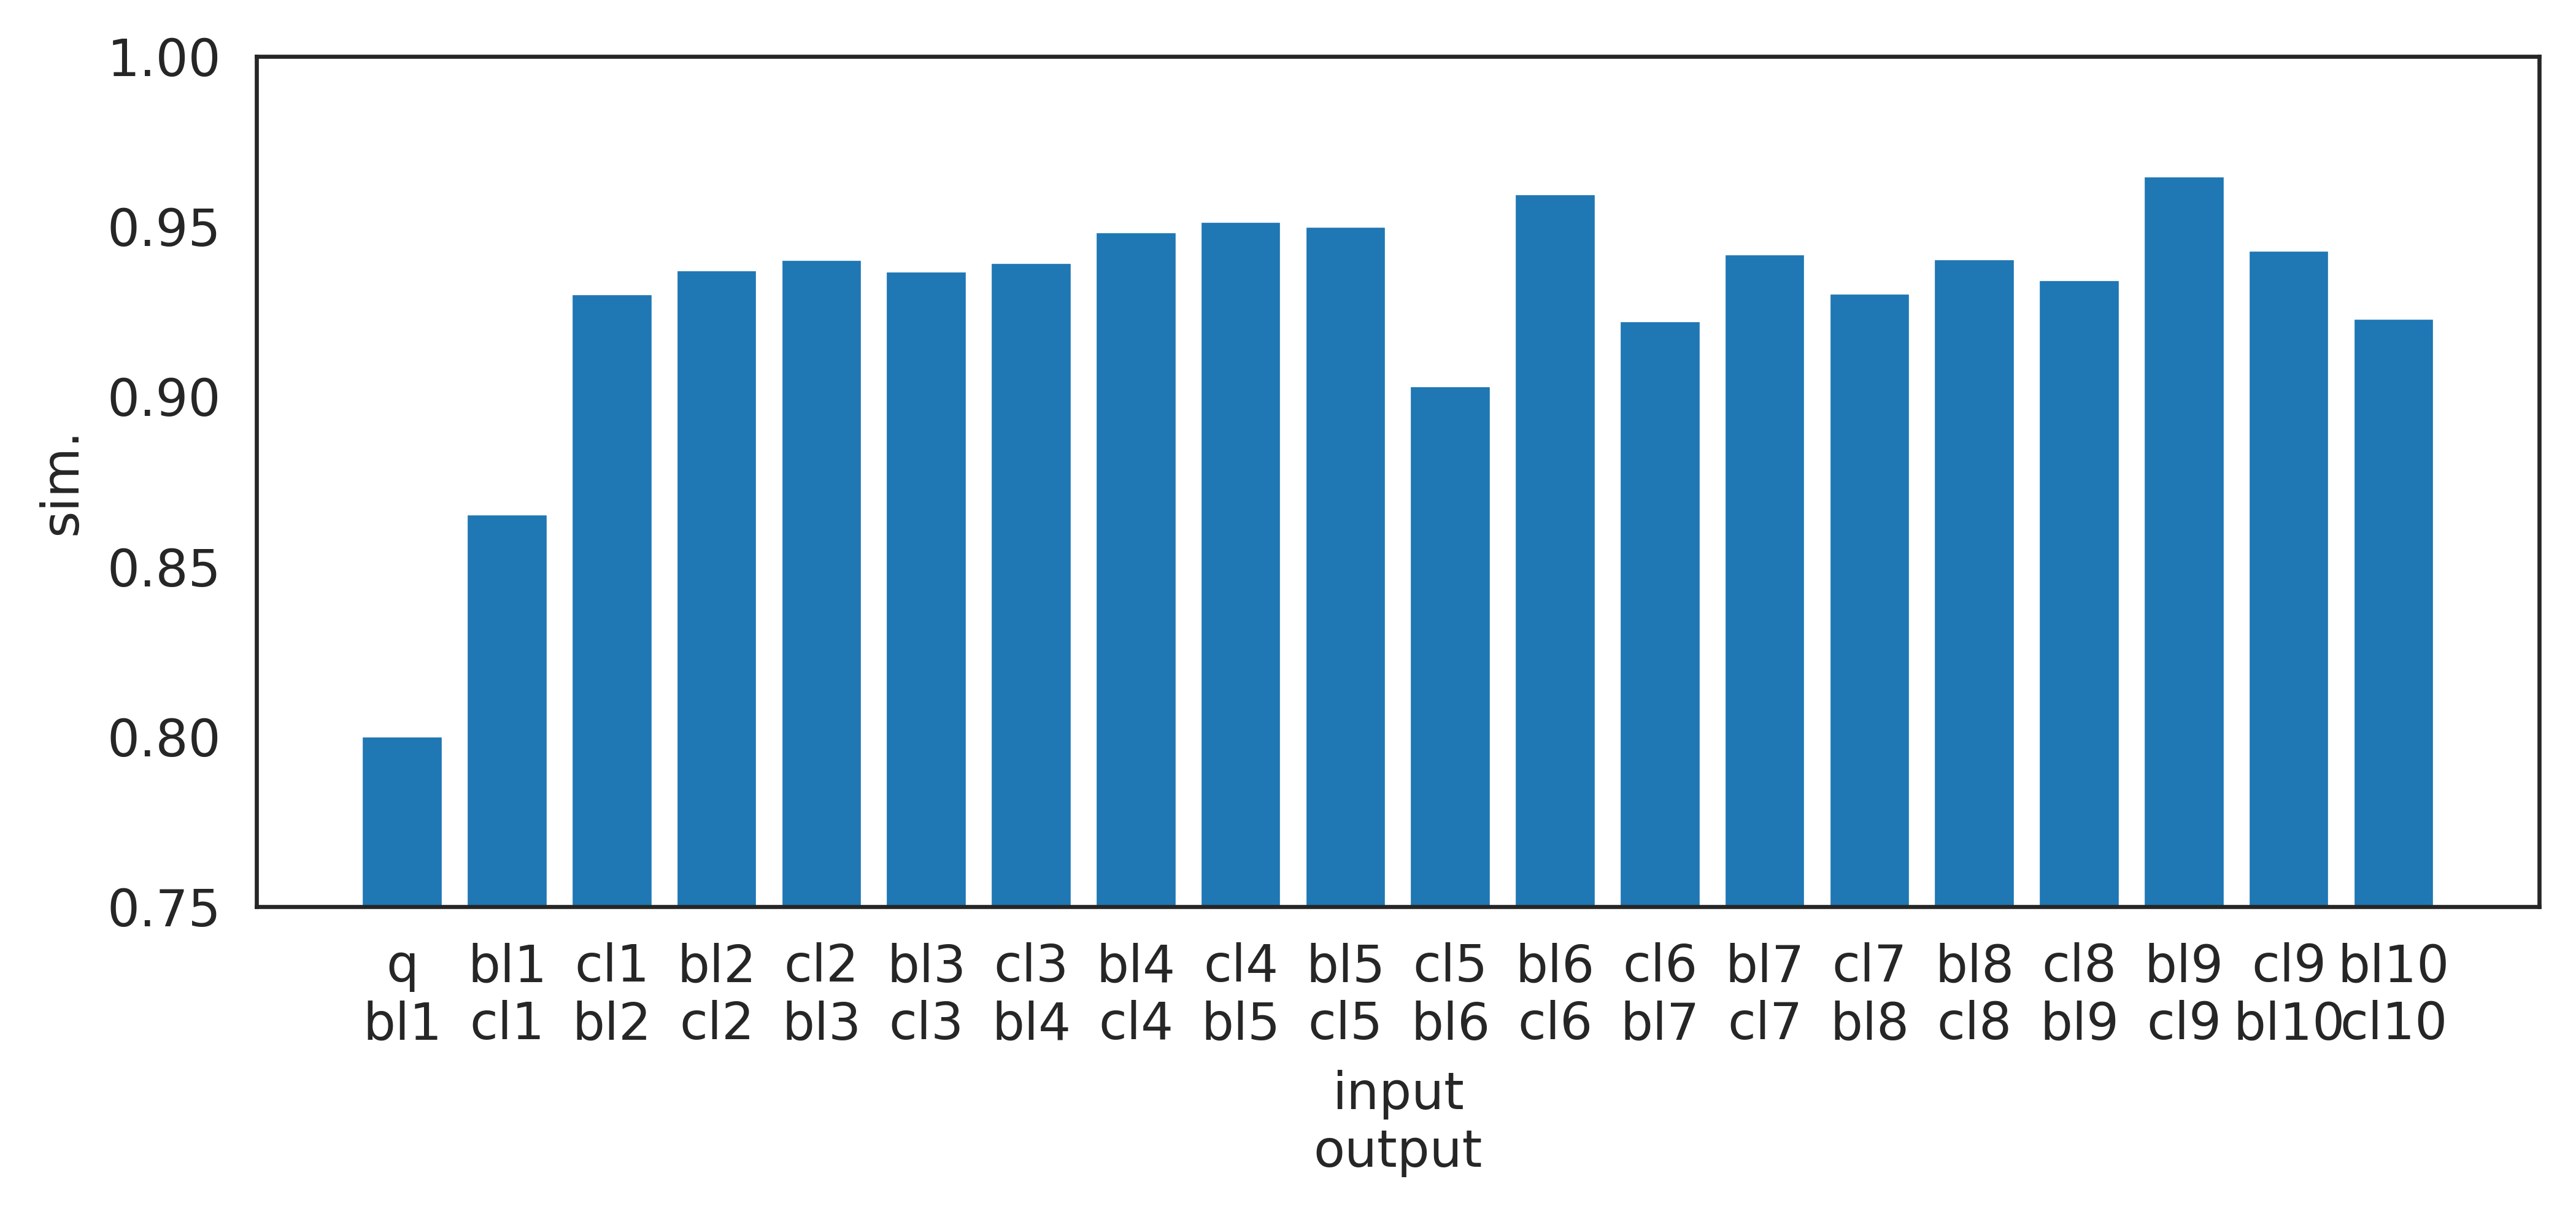

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

# xlabel
b_list = [ 'bl' + str(i) for i in range(1, 11) ]
c_list = [ 'cl' + str(i) for i in range(1, 11) ]

bc_list1 = [ i + '\n' + j for i,j in zip(b_list, c_list) ]
bc_list2 = [ j + '\n' + i for i,j in zip(b_list[1:] + ['-'], c_list) ]

xlabel = [ 'q\nbl1' ] + [val for pair in zip(bc_list1, bc_list2) for val in pair][:-1]

# plot
plt.close()
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,3),dpi=600)
plt.bar(xlabel, sim_list_interleaved)
plt.xticks(range(len(xlabel)), xlabel)
plt.ylim(0.75, 1.0)
plt.ylabel('sim.')
plt.xlabel('input\noutput')
# plt.savefig('fig1_bar.png', bbox_inches='tight')
plt.show()
plt.close()

In [6]:
import pandas as pd

embed_dict = {}
embed_dict.update(bard_lo_embed_dict)
embed_dict.update(bard_re_embed_dict)
embed_dict.update(bard_di_embed_dict)
embed_dict.update(cgpt_lo_embed_dict)
embed_dict.update(cgpt_re_embed_dict)
embed_dict.update(cgpt_di_embed_dict)

sim_df = pd.DataFrame(np.nan, columns=embed_dict.keys(), index=embed_dict.keys())

for i in embed_dict.keys():
    for j in embed_dict.keys():
        sim_df.loc[i, j] = np.dot(embed_dict[i], embed_dict[j])

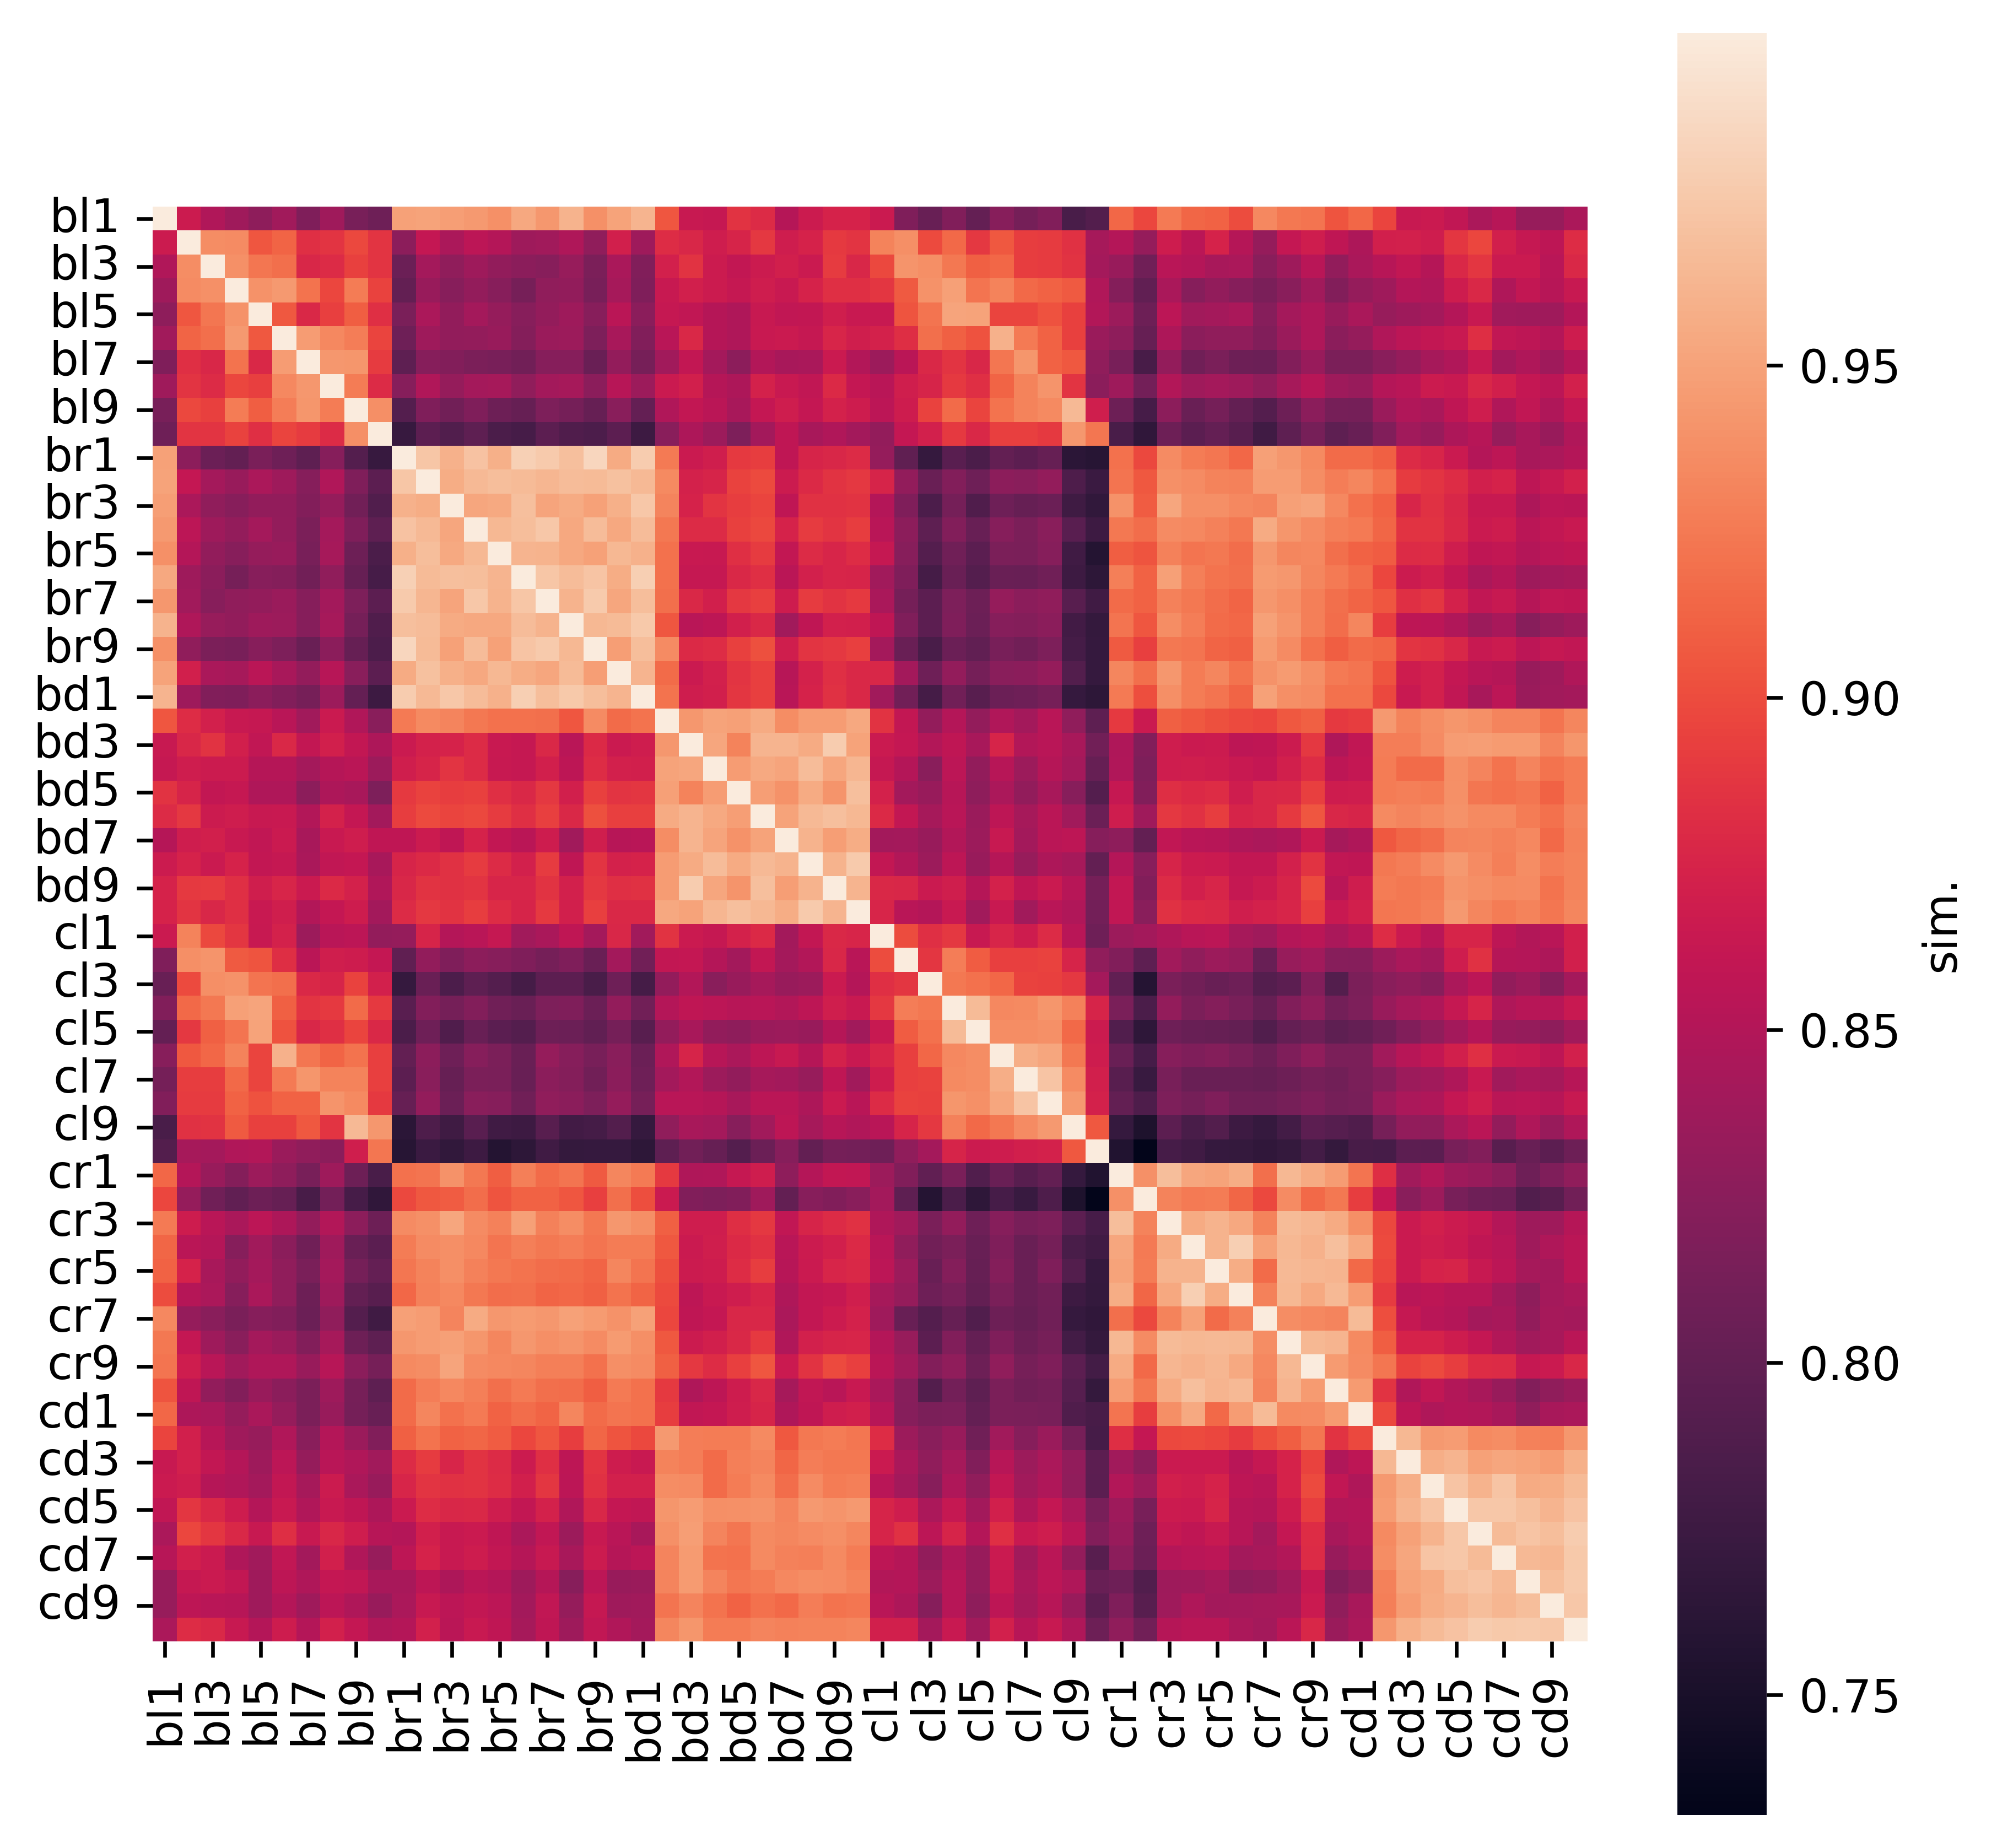

In [7]:
import seaborn as sns
plt.close()
sns.reset_defaults()
#sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7,7),dpi=600)
ax.set_aspect("equal")
sns.heatmap(sim_df)
ax.collections[0].colorbar.set_label("sim.")
#plt.savefig('fig2_heatmap.png', bbox_inches='tight')
plt.show()
plt.close()

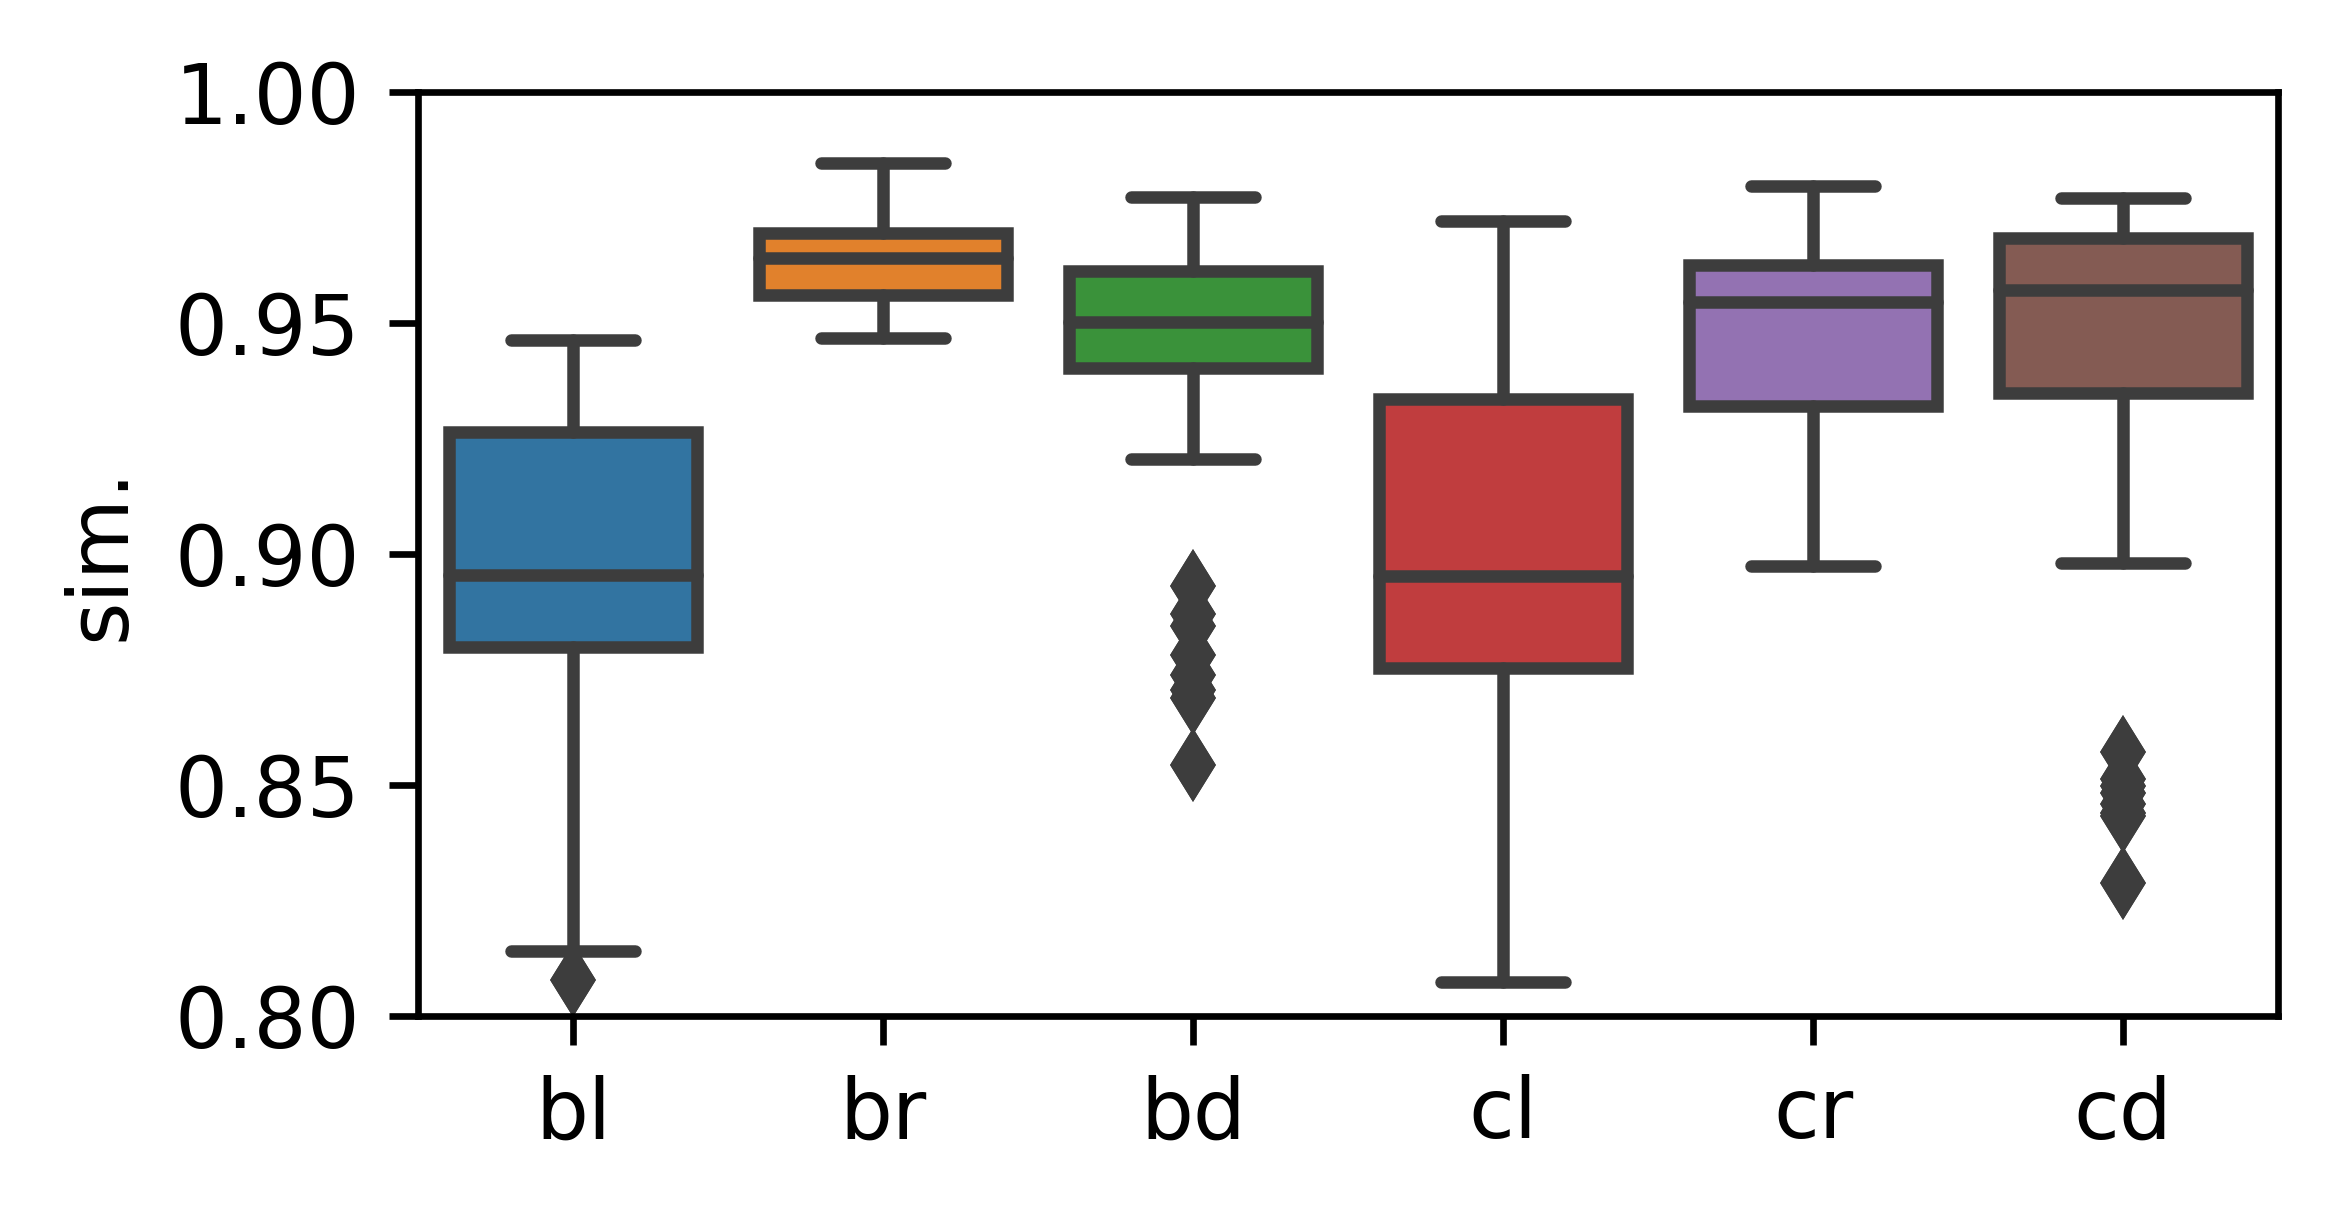

In [8]:
sim_df_long = sim_df.stack().reset_index().set_axis('run1 run2 sim.'.split(), axis=1)
sim_df_long = sim_df_long.loc[sim_df_long['run1']!=sim_df_long['run2']]
sim_df_long['group'] = np.nan
sim_df_long.loc[ (sim_df_long['run1'].str.contains('bl') ) & ( sim_df_long['run2'].str.contains('bl') ), 'group'] = 'bl'
sim_df_long.loc[ (sim_df_long['run1'].str.contains('br') ) & ( sim_df_long['run2'].str.contains('br') ), 'group'] = 'br'
sim_df_long.loc[ (sim_df_long['run1'].str.contains('bd') ) & ( sim_df_long['run2'].str.contains('bd') ), 'group'] = 'bd'
sim_df_long.loc[ (sim_df_long['run1'].str.contains('cl') ) & ( sim_df_long['run2'].str.contains('cl') ), 'group'] = 'cl'
sim_df_long.loc[ (sim_df_long['run1'].str.contains('cr') ) & ( sim_df_long['run2'].str.contains('cr') ), 'group'] = 'cr'
sim_df_long.loc[ (sim_df_long['run1'].str.contains('cd') ) & ( sim_df_long['run2'].str.contains('cd') ), 'group'] = 'cd'

sim_df_long = sim_df_long[sim_df_long['group'].notna()]

# plot
plt.close()
fig, ax = plt.subplots(figsize=(4,2),dpi=600)
sns.set_style("whitegrid")
sns.boxplot(data=sim_df_long, y='sim.', x='group')
plt.xlabel('')
plt.ylim(0.8,1.0)
#plt.savefig('fig3_box.png', bbox_inches='tight')
plt.show()
plt.close()

In [9]:
import scipy

group1_list = []
group2_list = []
p_list = []

for group1 in ['bl','cl']:

    for group2 in sim_df_long['group'].unique():

        if group1 != group2:

            a = sim_df_long.loc[sim_df_long['group']==group1, 'sim.']
            b = sim_df_long.loc[sim_df_long['group']!=group2, 'sim.']

            group1_list.append(group1)
            group2_list.append(group2)
            p_list.append(scipy.stats.ttest_ind(a, b)[1])

p_df = pd.DataFrame({'group1': group1_list, 'group2': group2_list, 'pvalue': p_list})

In [10]:
p_df

,group1,group2,pvalue
0,bl,br,7.840359e-10
1,bl,bd,2.472526e-12
2,bl,cl,2.301409e-19
3,bl,cr,4.791433e-11
4,bl,cd,9.460349e-14
5,cl,bl,2.078992e-16
6,cl,br,1.850421e-06
7,cl,bd,1.466486e-08
8,cl,cr,1.489408e-07
9,cl,cd,1.443274e-09
